## Investigation On Intervals and Determine whether it's meal

In [2]:
import meals as ml
import tools as tl
import intervals as invs

import paths
from preprocessing import read_excel_by_sheet

path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

In [1]:
ctrl_pellet_avg = [] # store control group average pellet in an hour
cask_pellet_avg = [] # same for cask group
fr1_ctrl_meal_count = [] # store daily average meal for control group
fr1_cask_meal_count = [] # store daily average meal for cask group

## Control Group

### Bhv 3

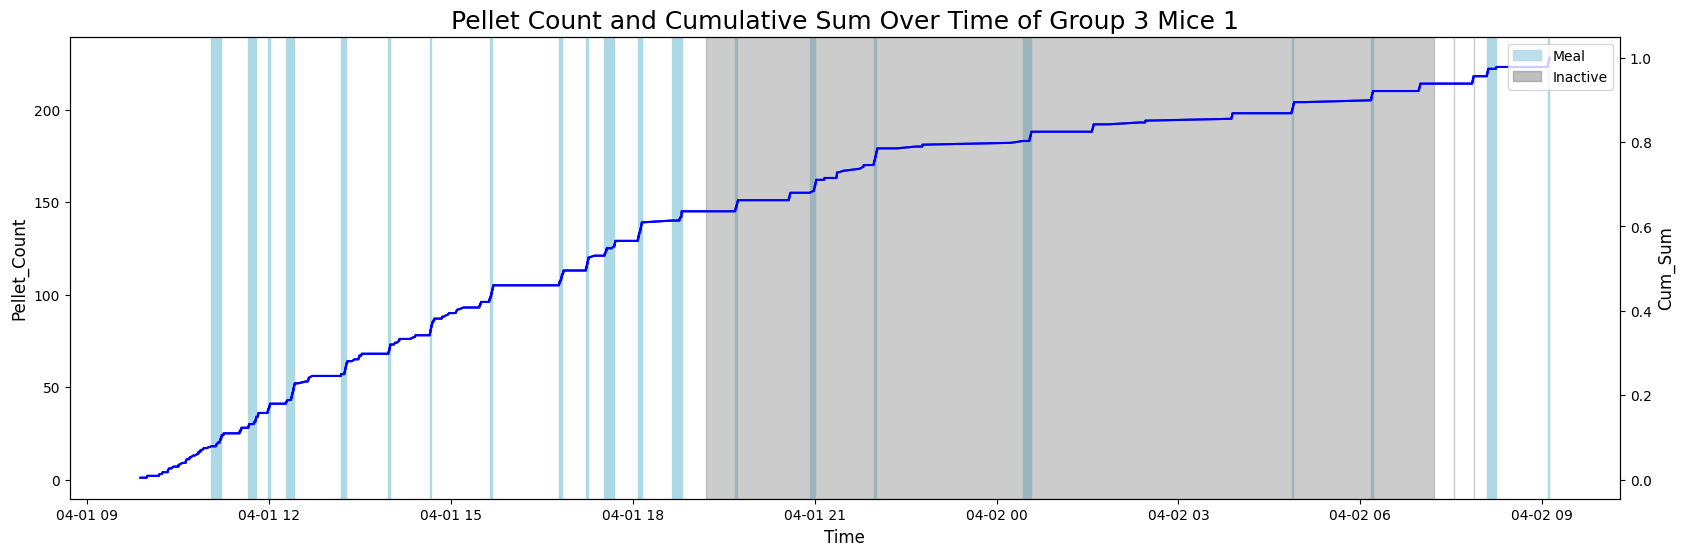

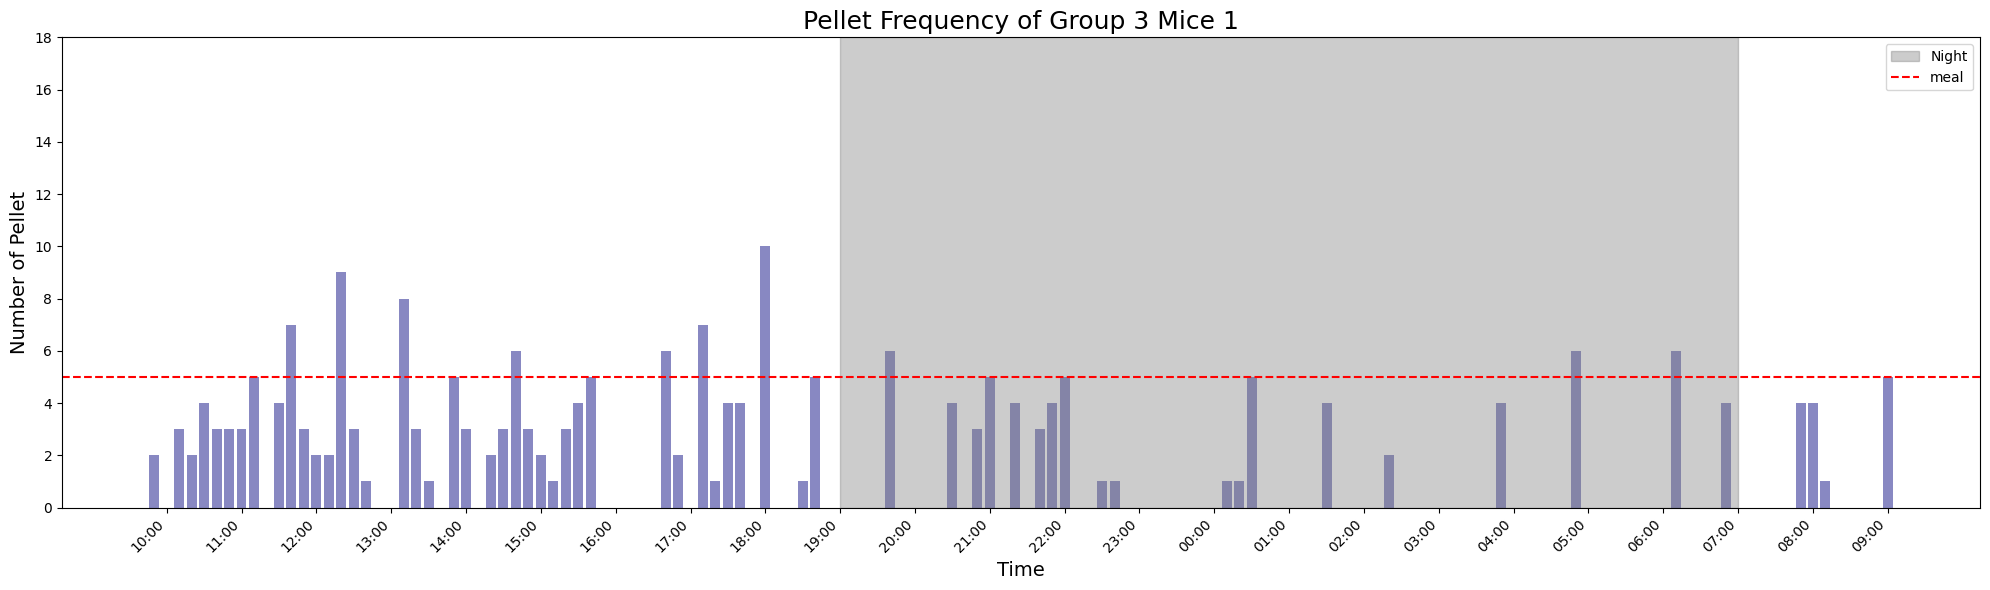

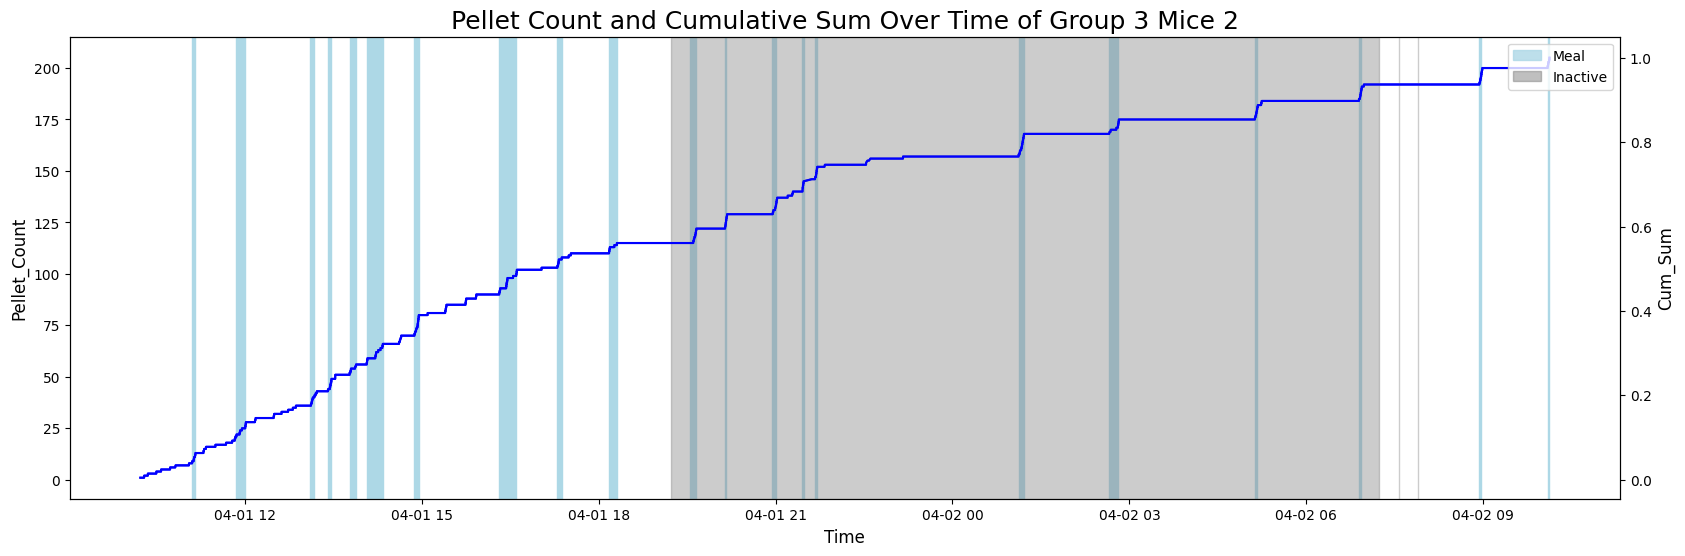

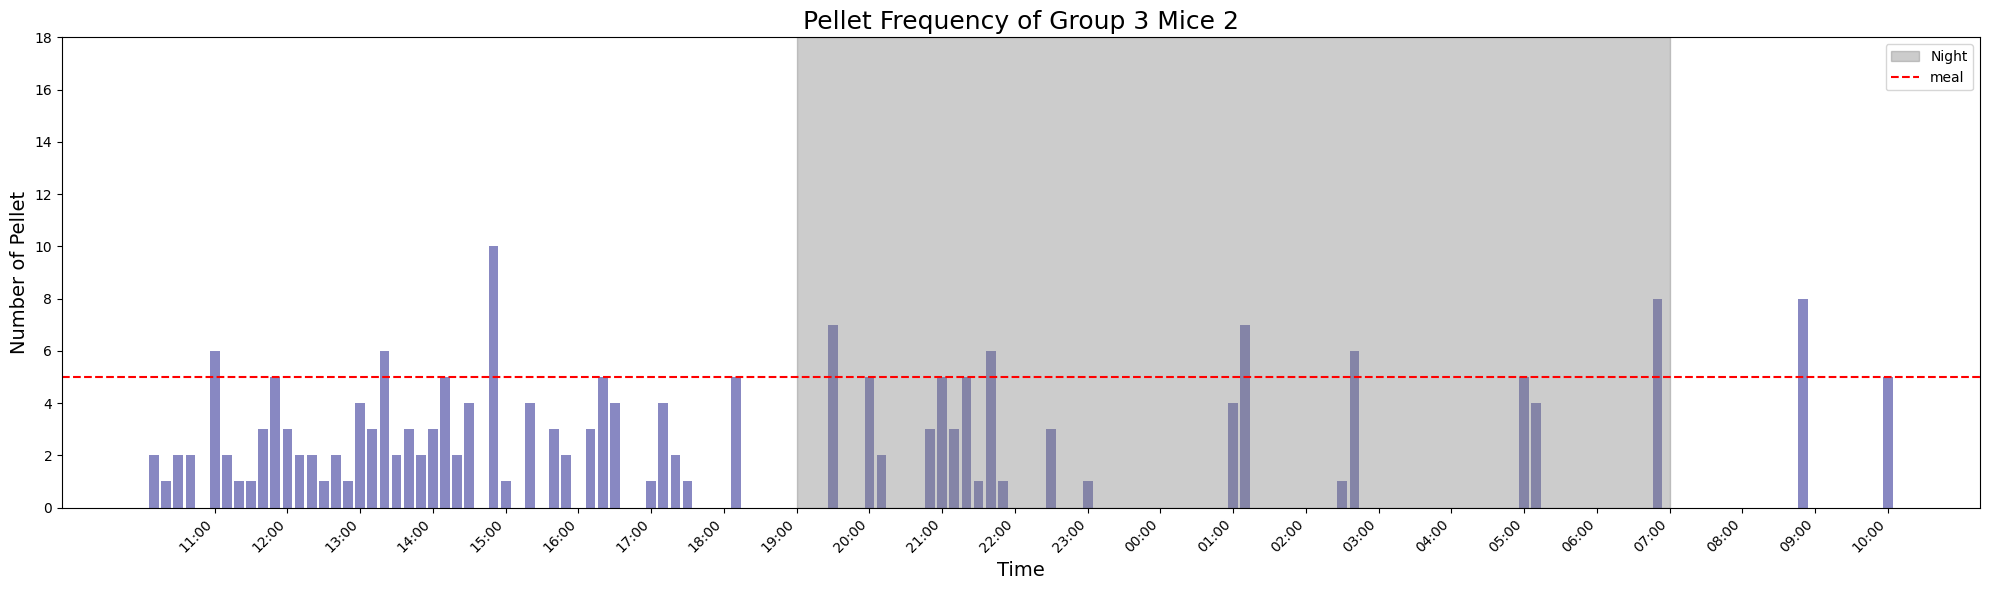

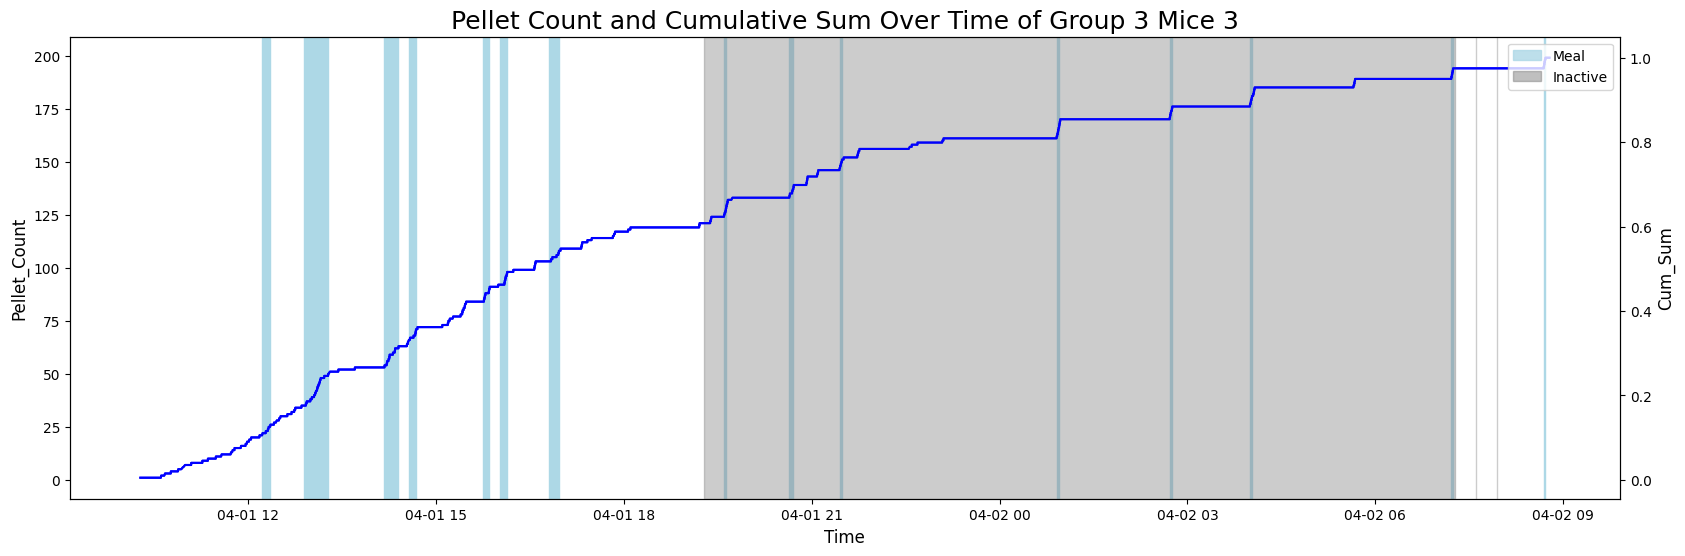

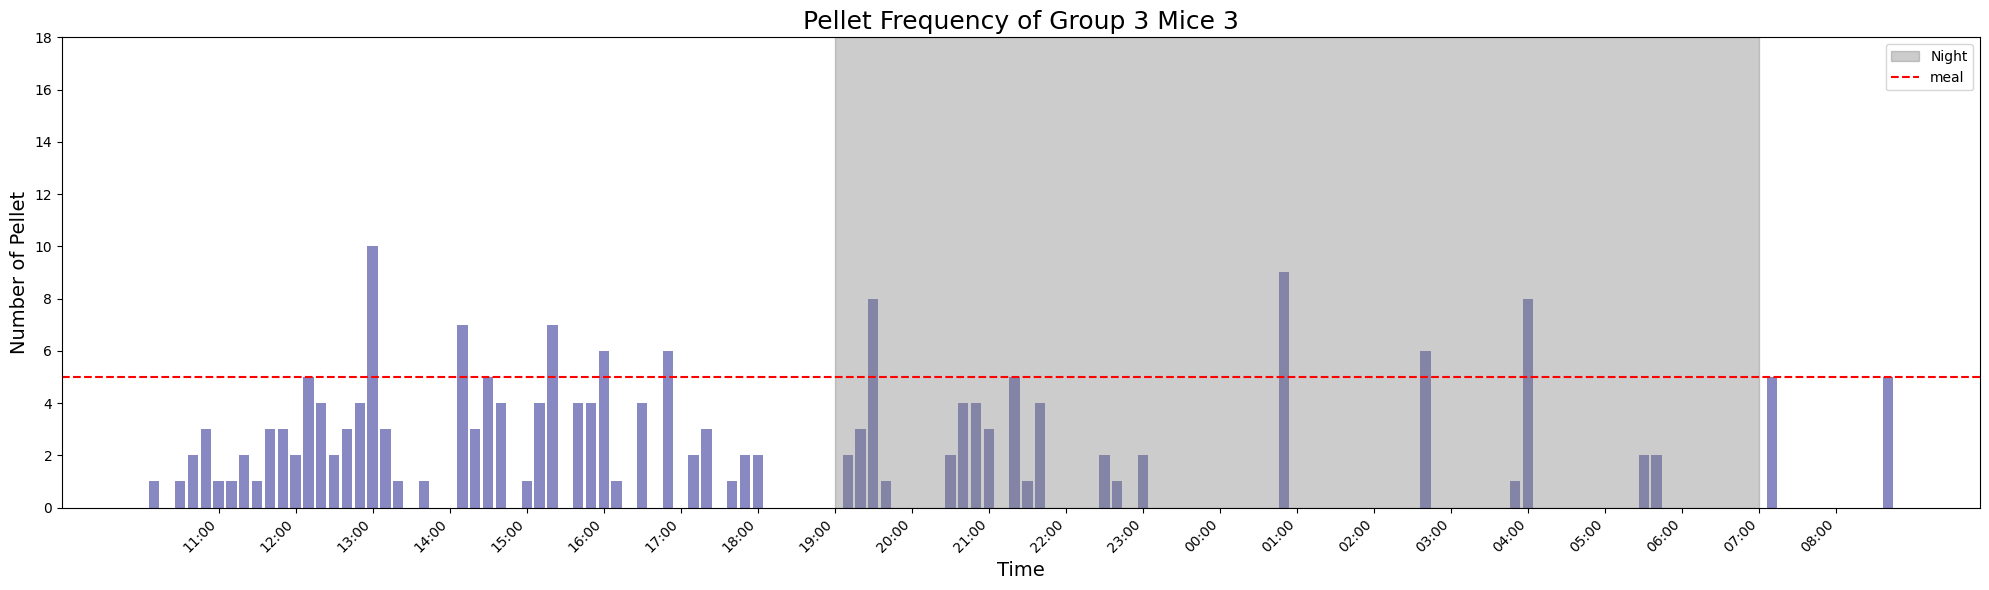

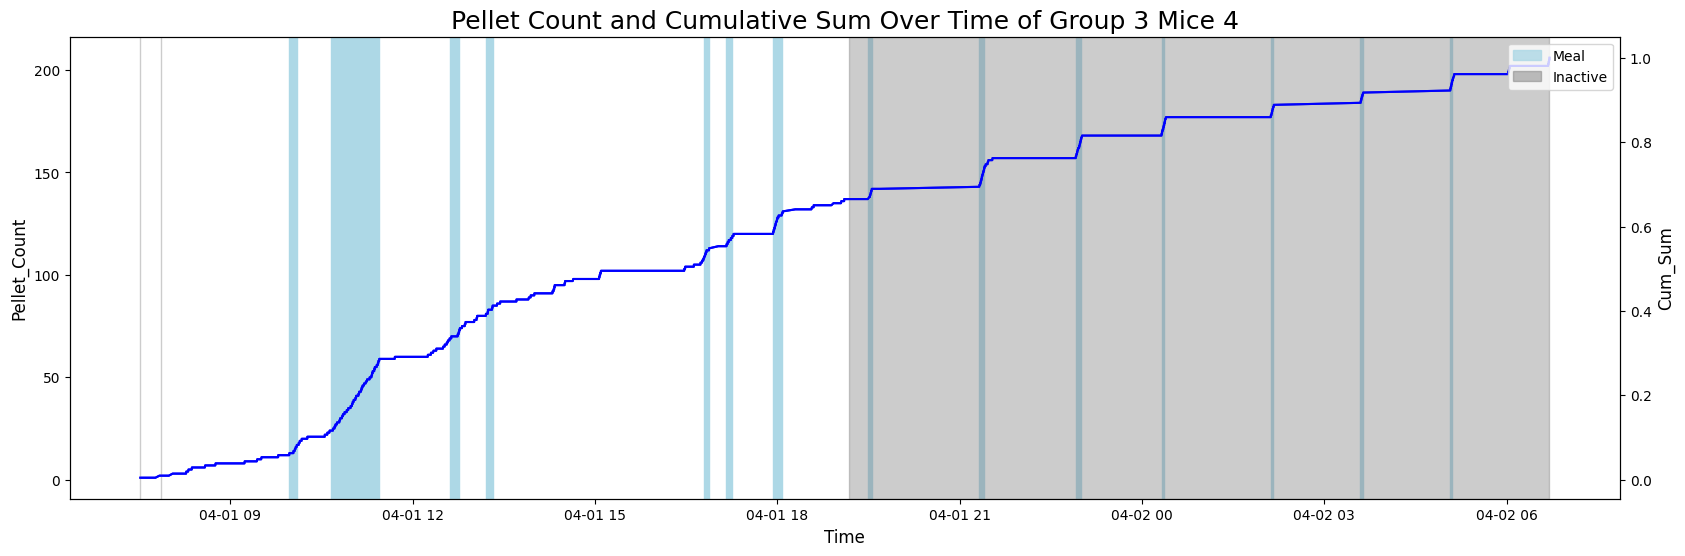

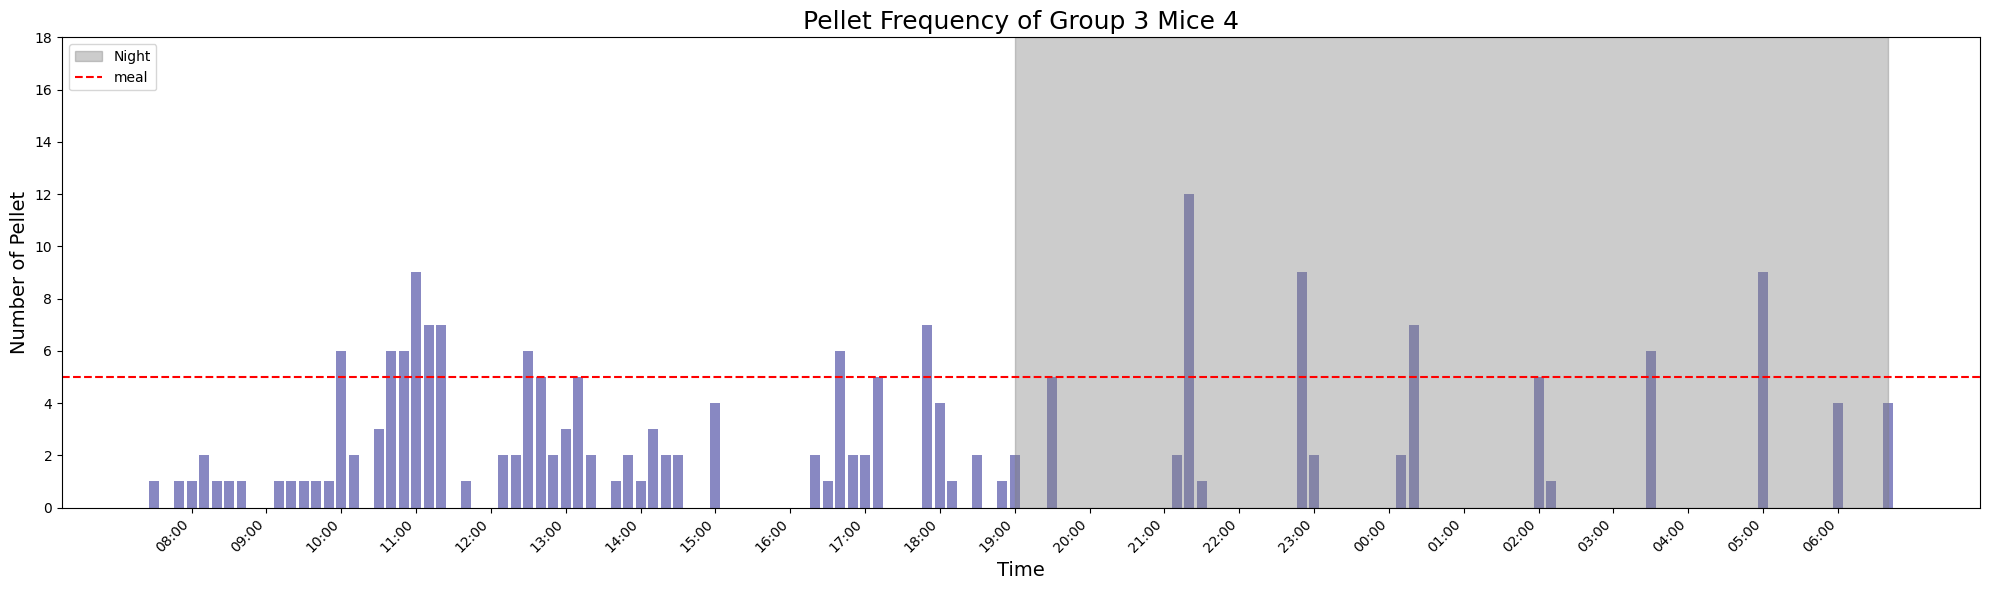

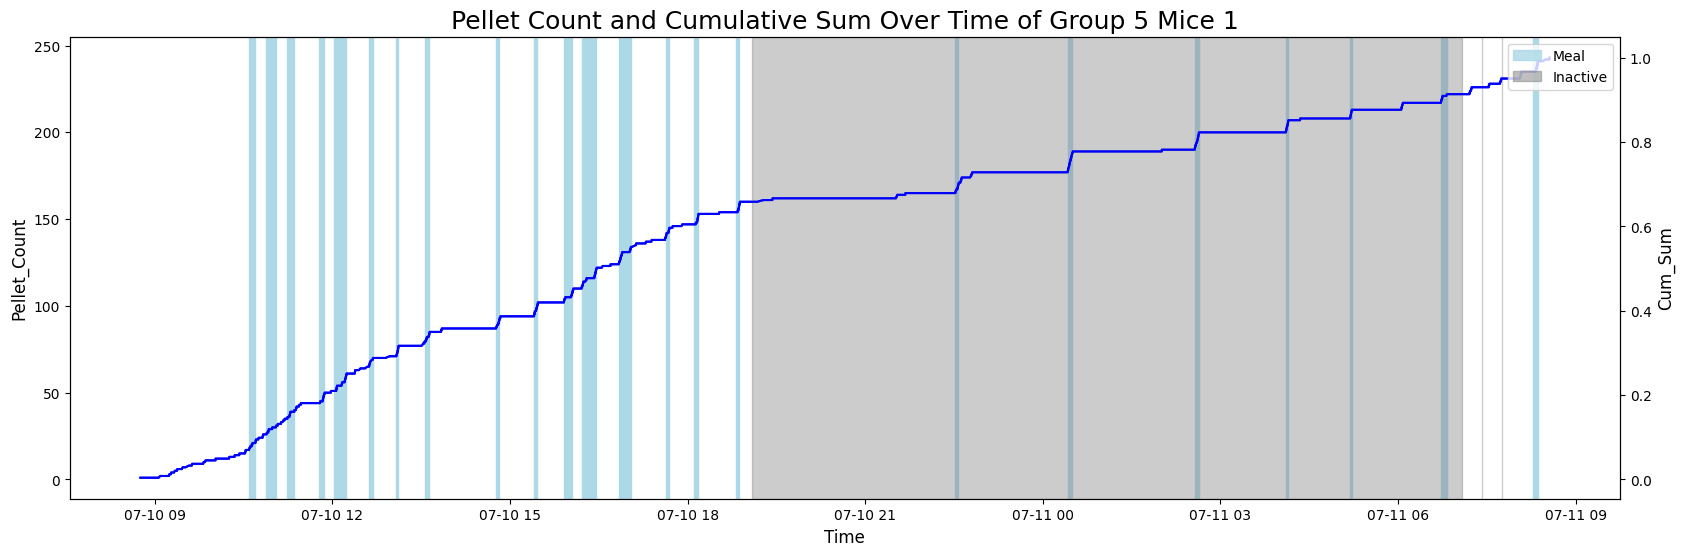

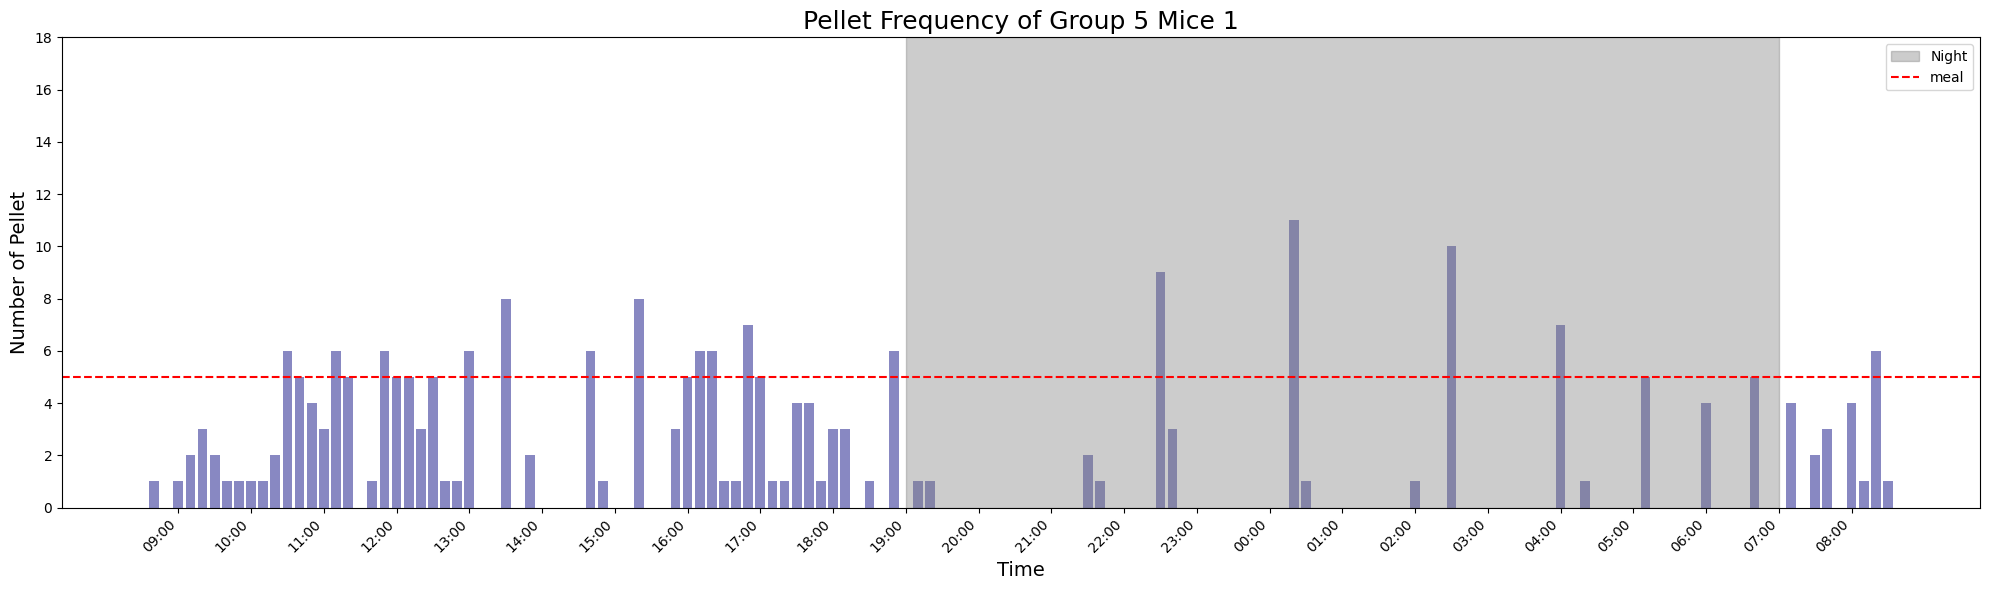

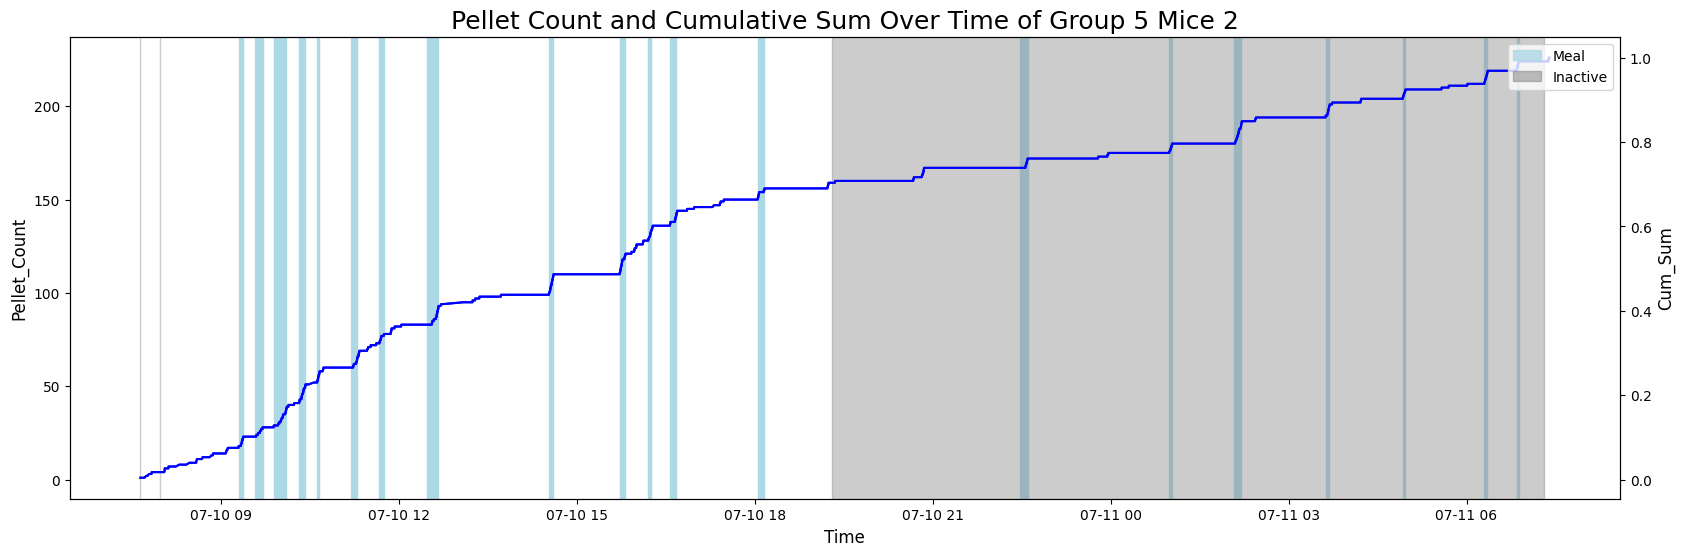

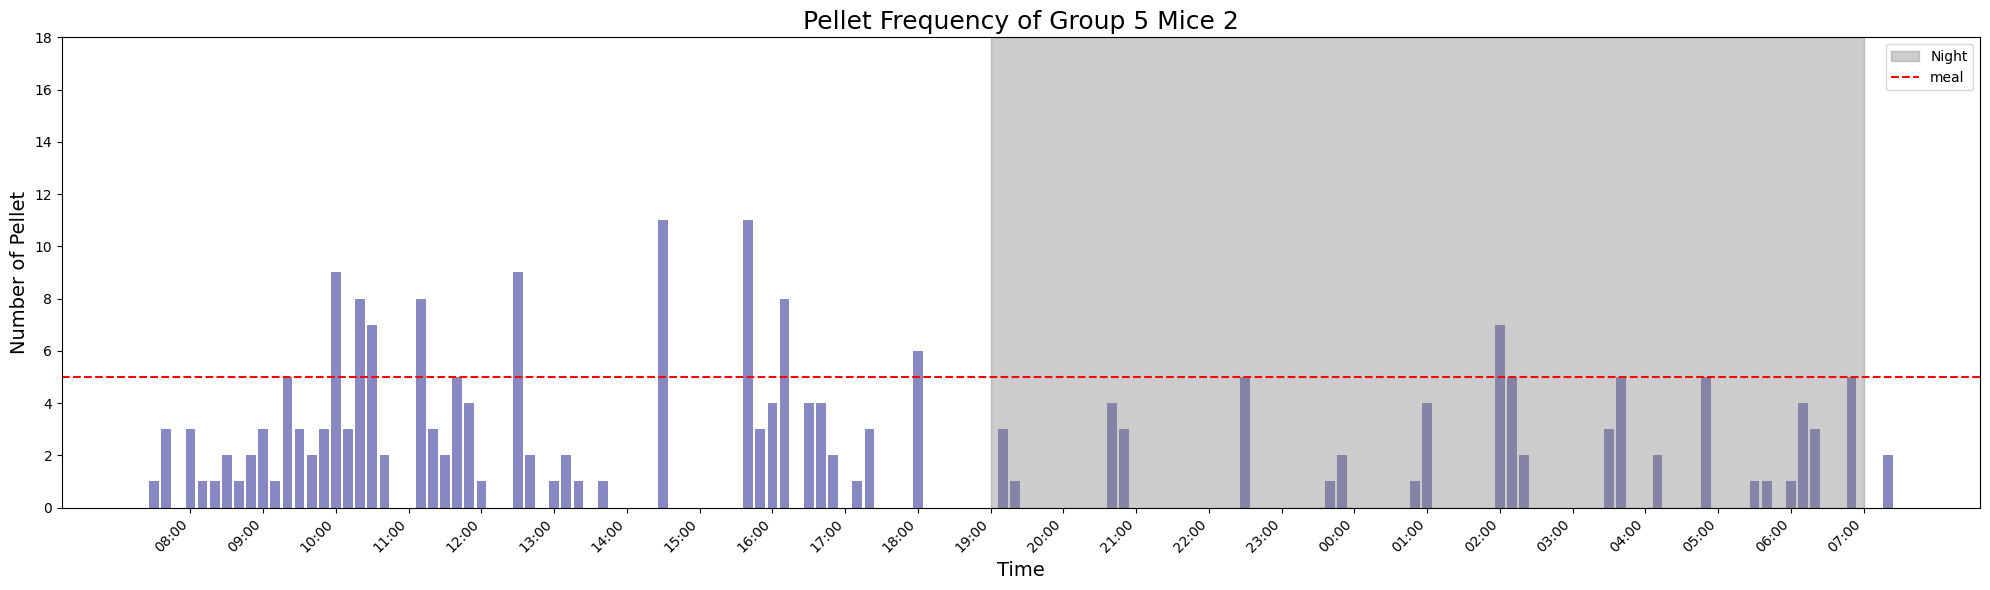

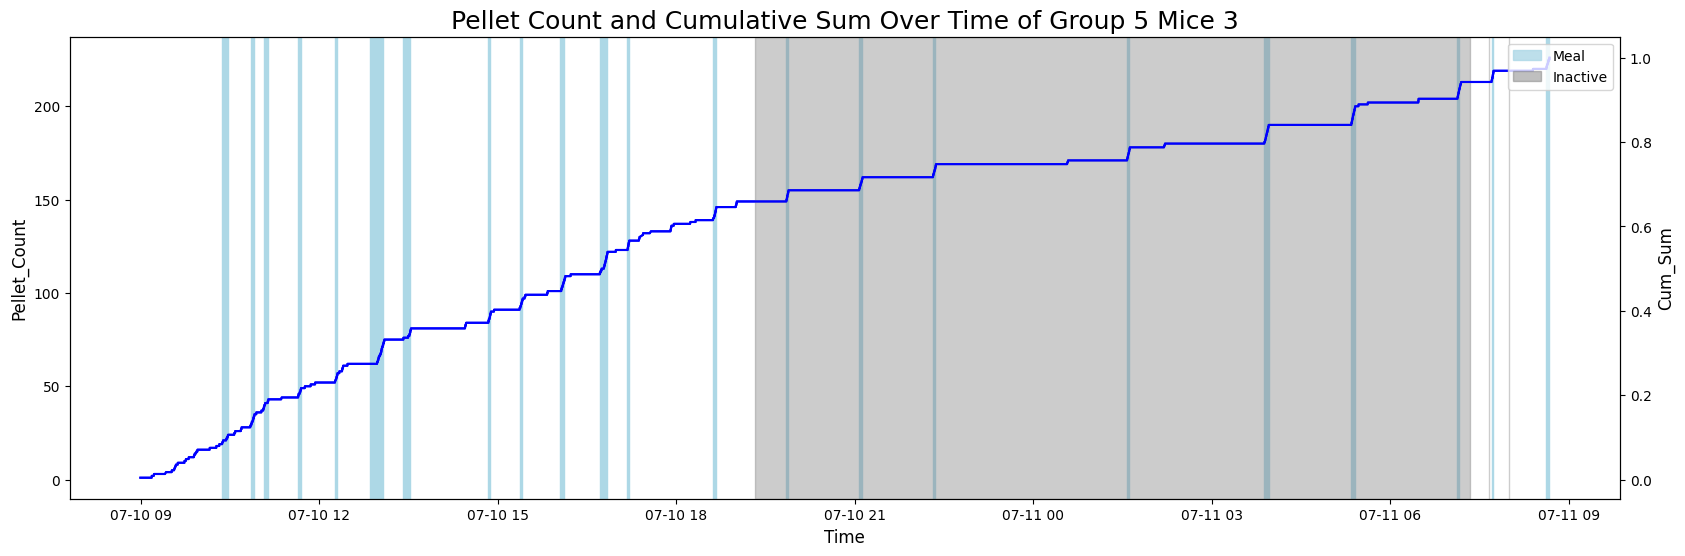

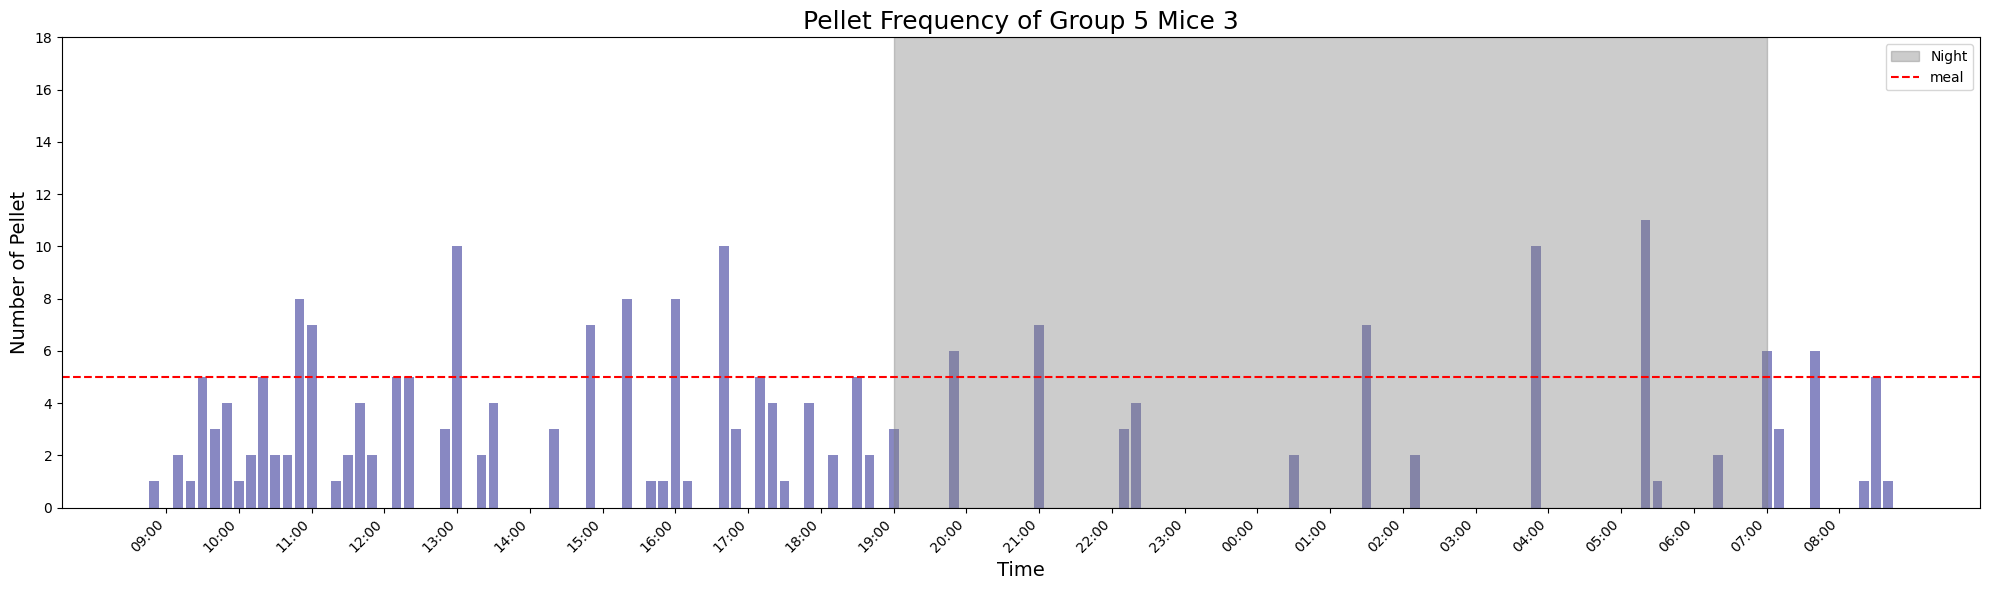

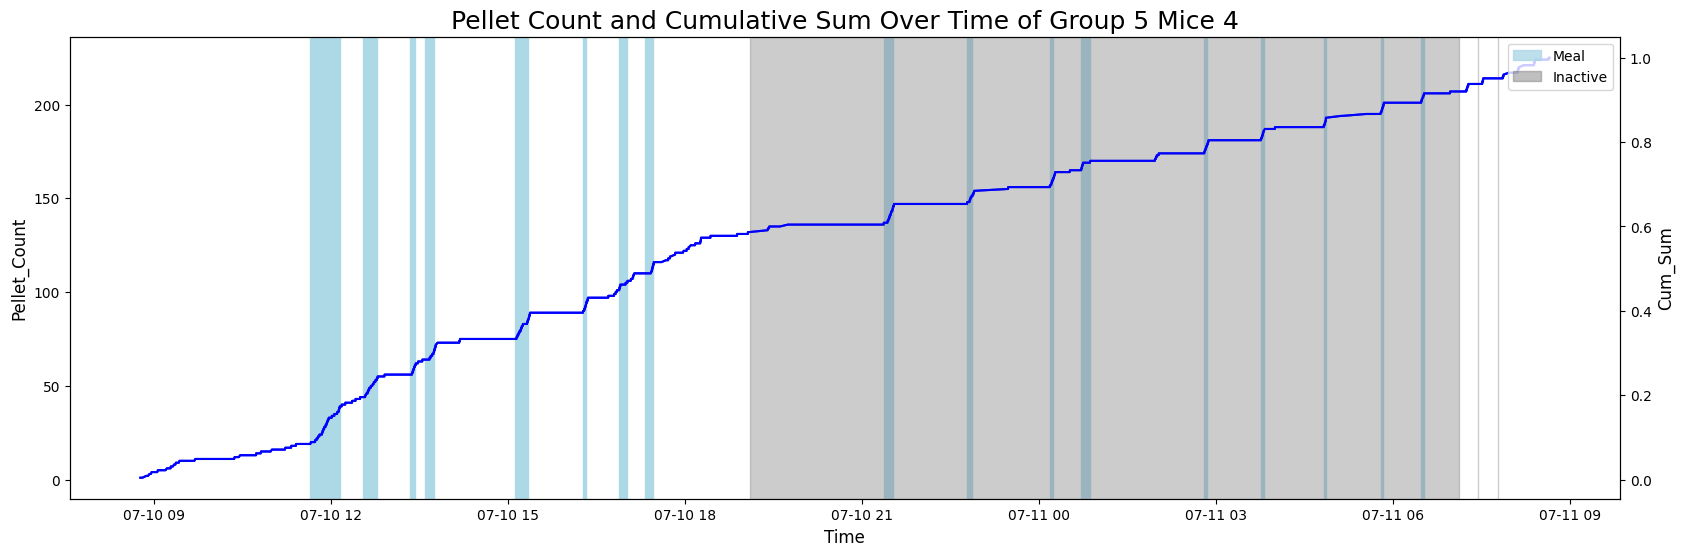

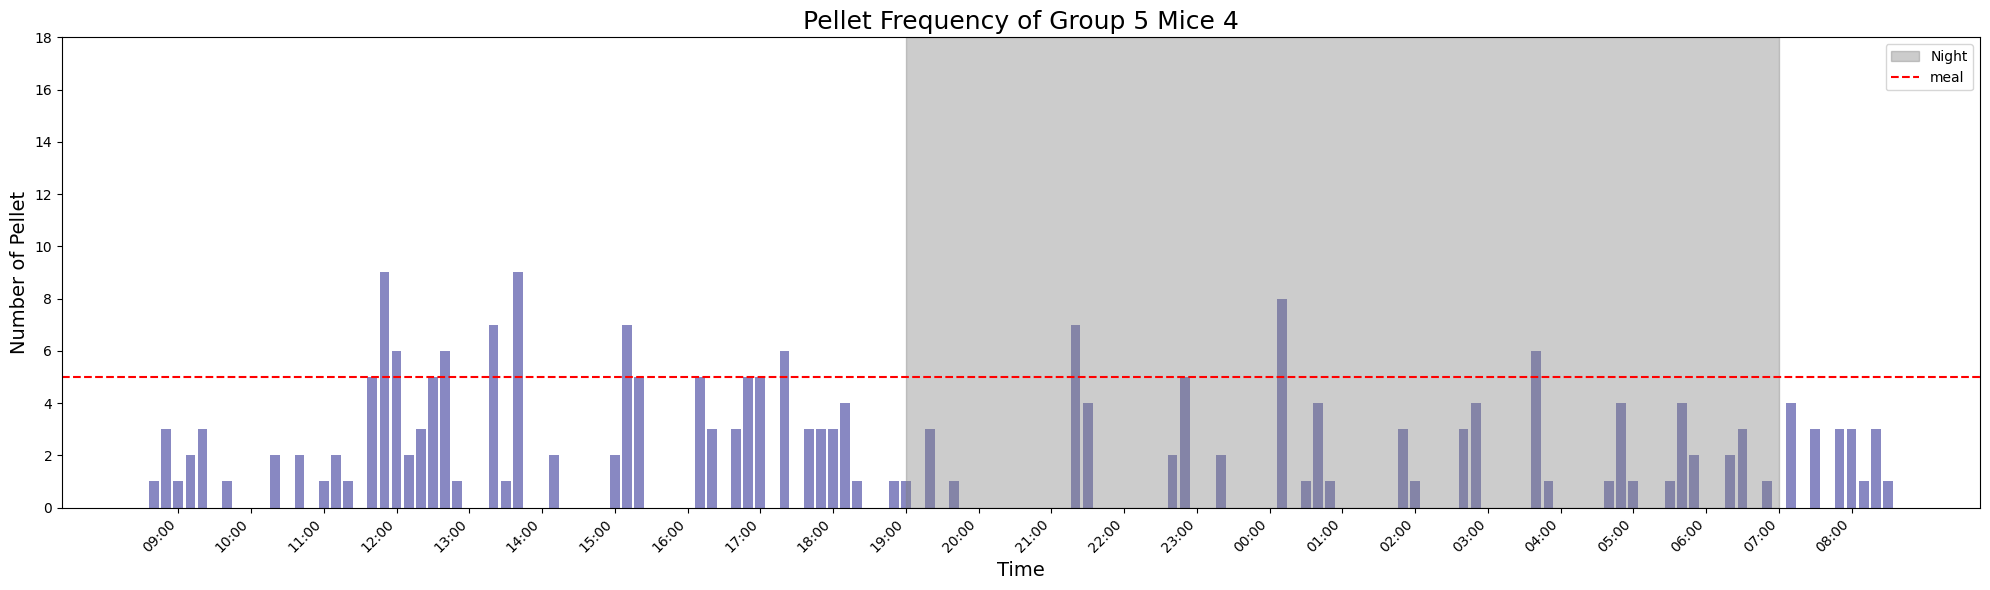

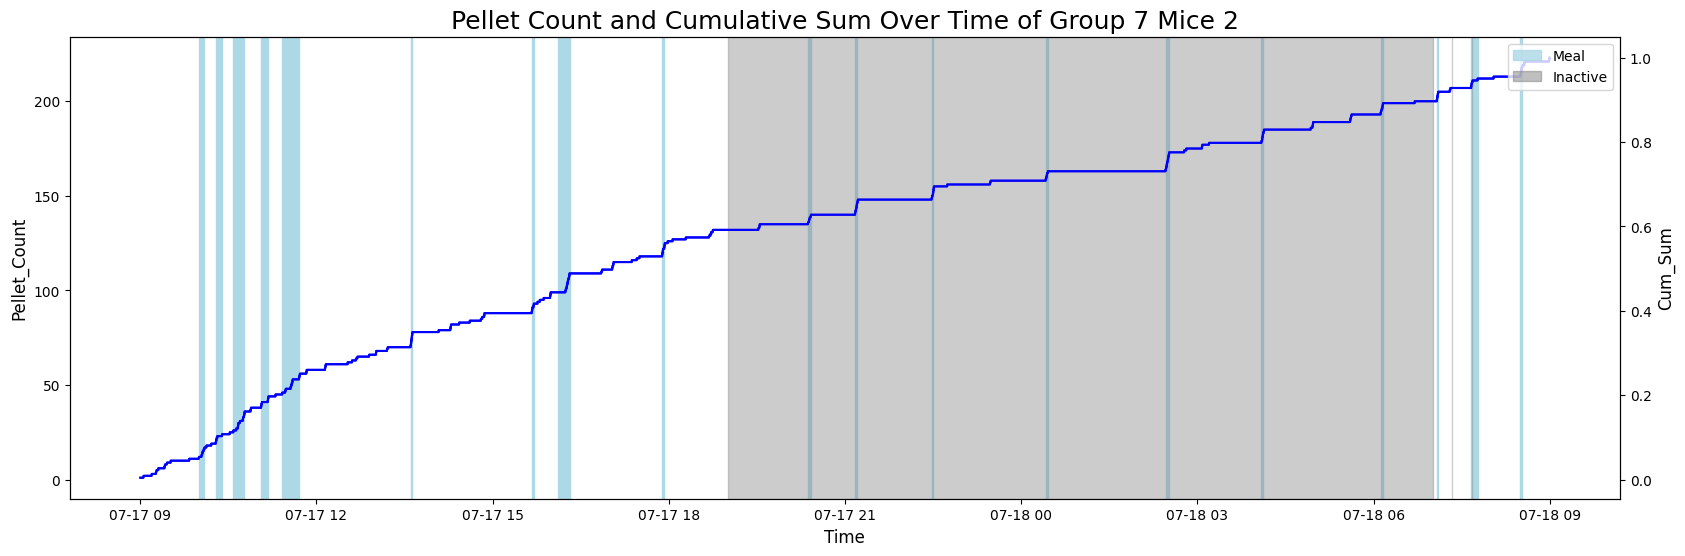

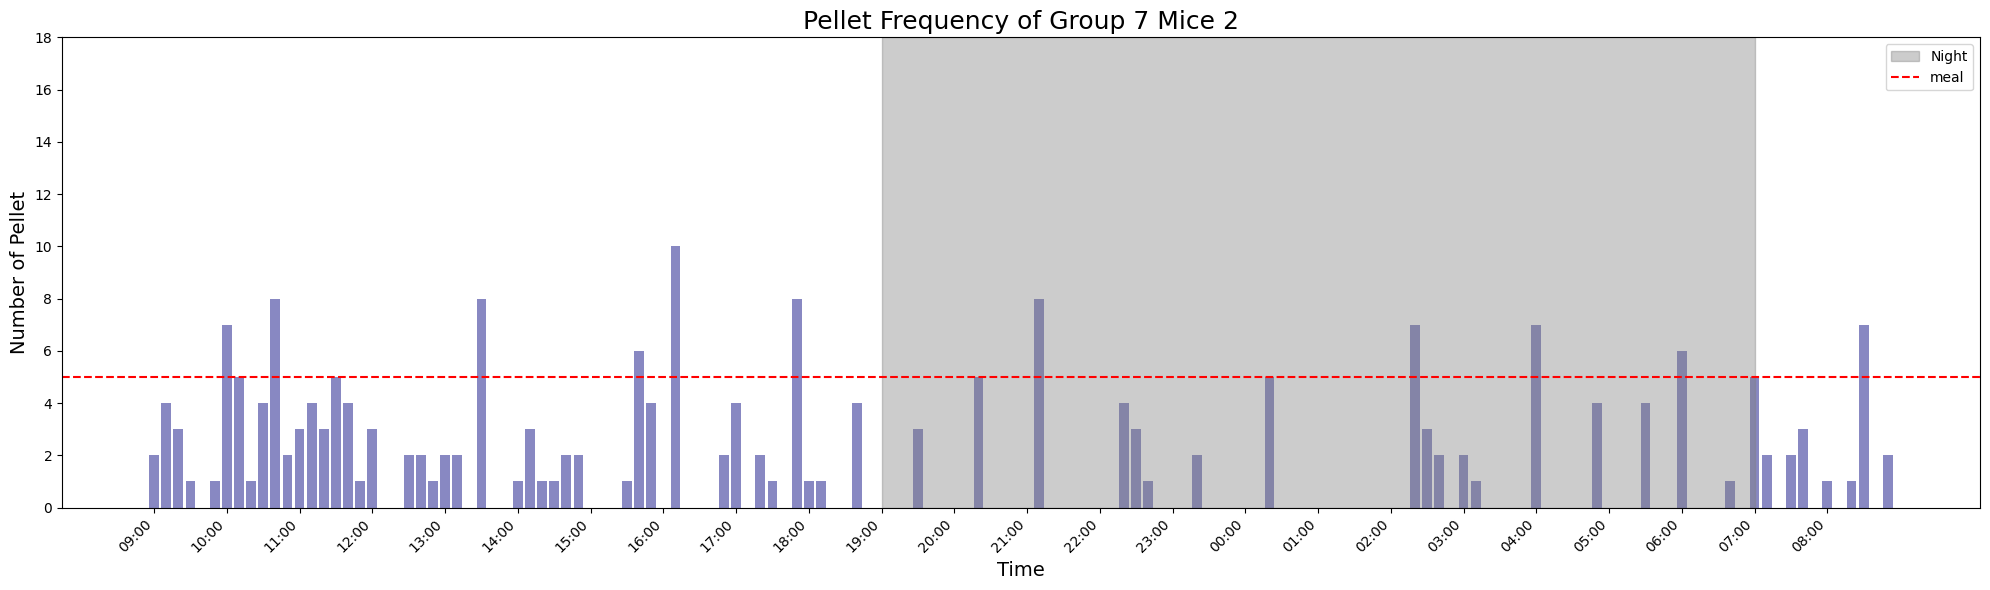

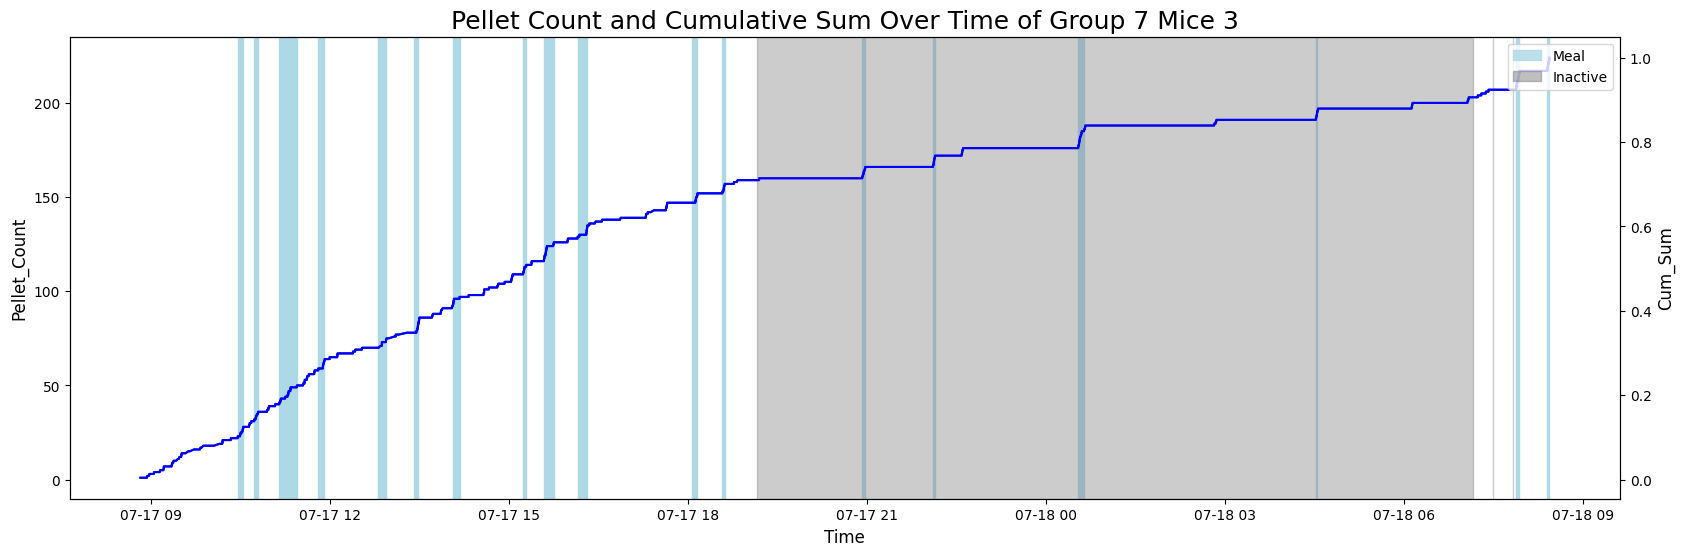

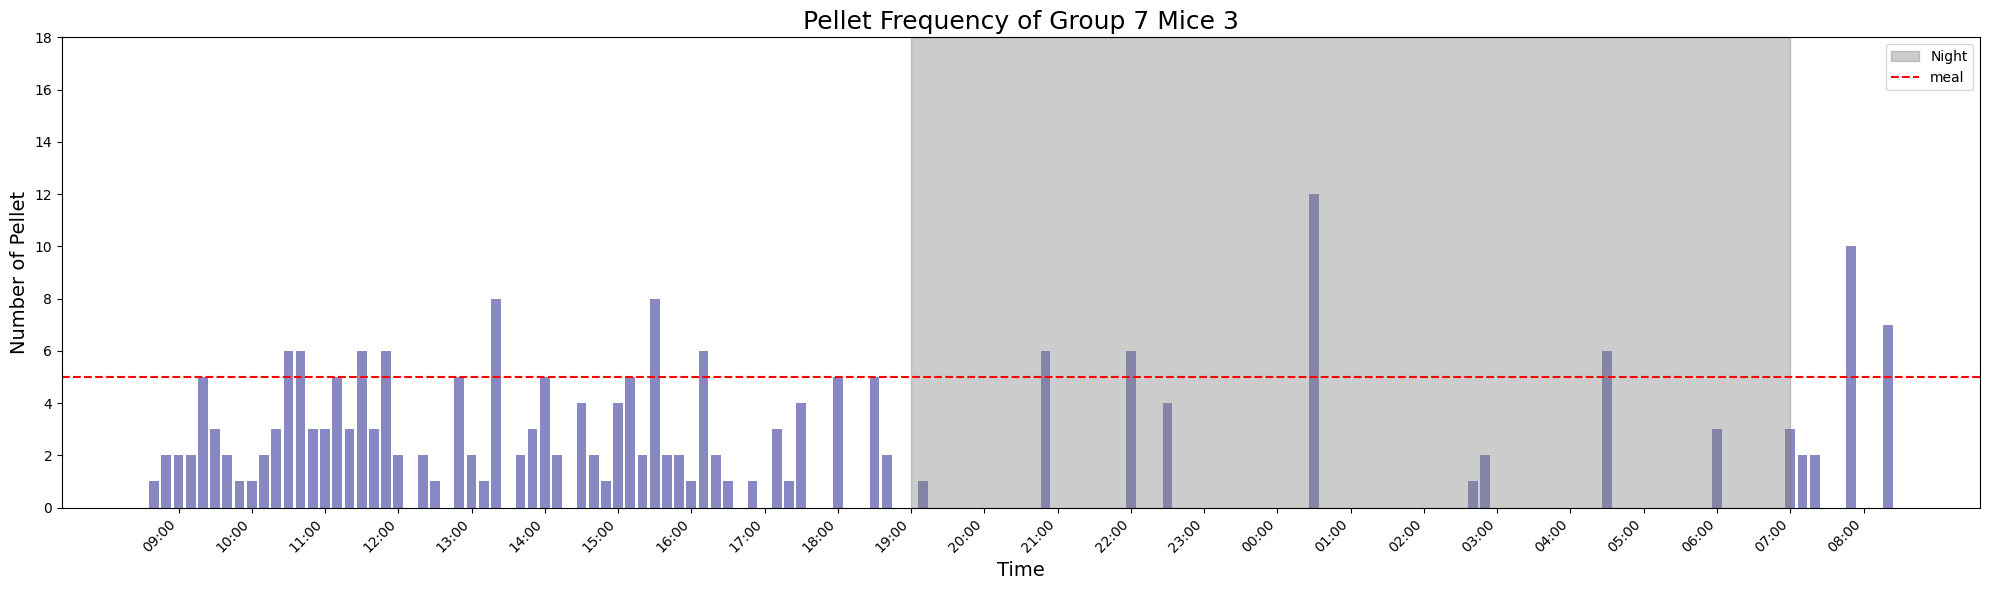

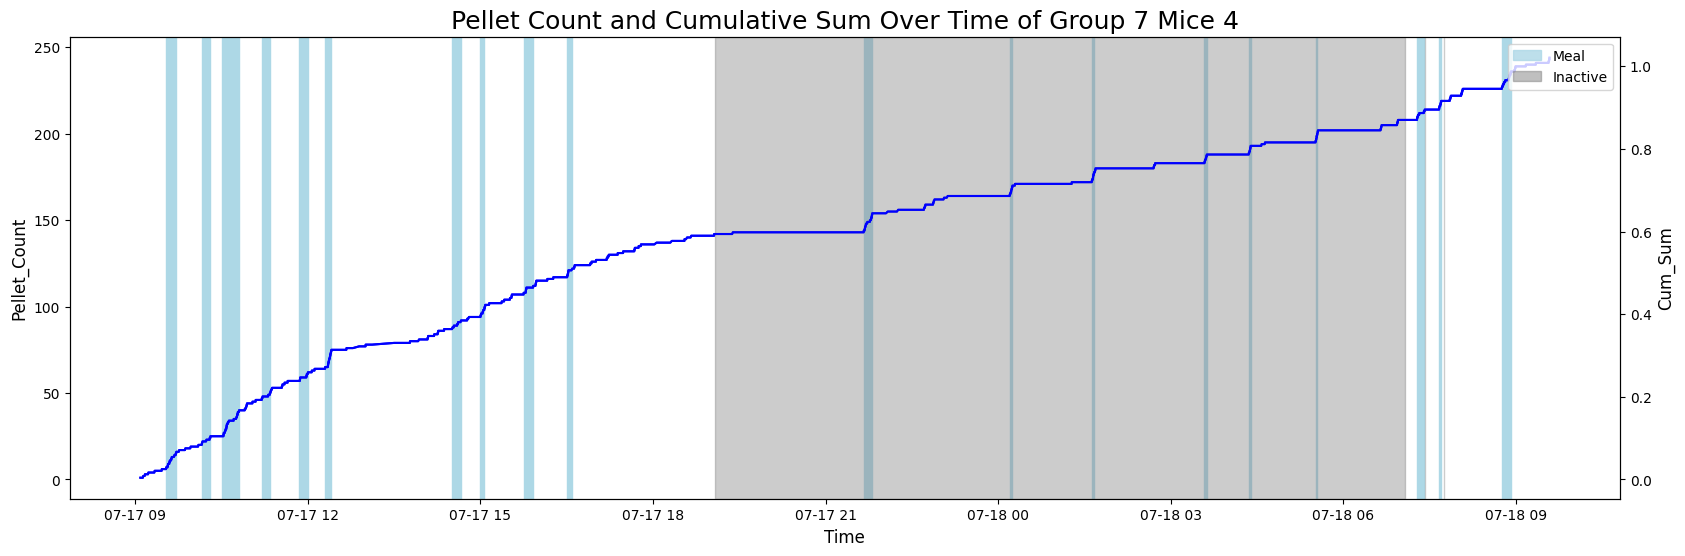

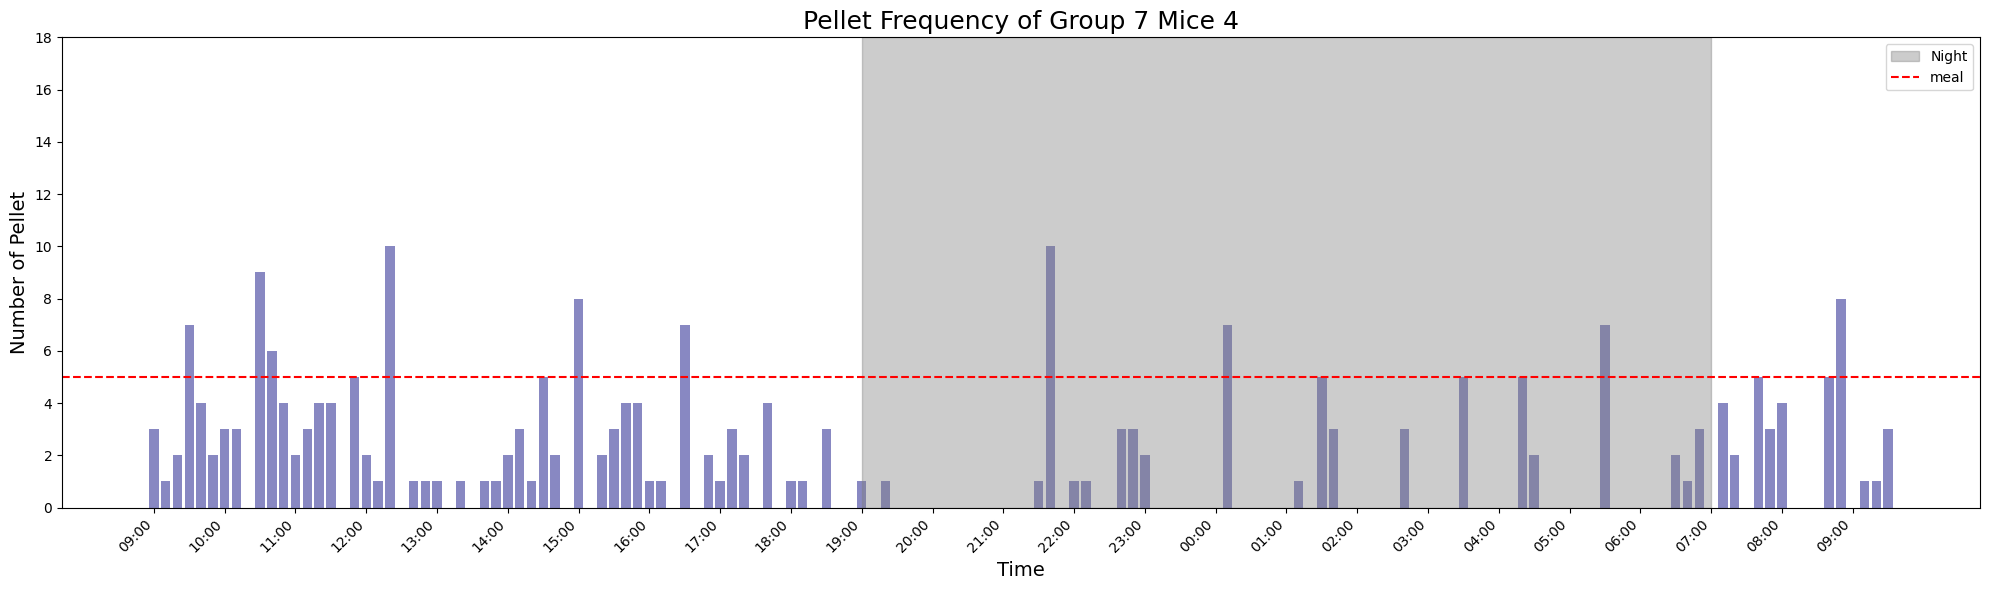

In [4]:
# use first 3 data as examples
for sheet in paths.fr1_ctrl_sheet:
    data = read_excel_by_sheet(sheet, path)
    
    # find all meals and their time period in  a list
    meal = ml.find_meals(data)
    
    # find pellet frequency in each 10=minute block
    group = ml.find_pellet_frequency(data)
    
    bhv, num = tl.get_bhv_num(sheet)
    
    # plot cumulative pellet consumption graph
    ml.graphing_cum_count(data, meal, bhv, num)
    # plot pellet frequency
    ml.graph_pellet_frequency(group, bhv, num)
    
    # calculate average pellet in unit of hour
    temp = ml.average_pellet(group)
    ctrl_pellet_avg.append(temp)
    # find average meal each day
    avg = round(len(meal)/ml.experiment_duration(data), 2)
    fr1_ctrl_meal_count.append(avg)

## CASK Group

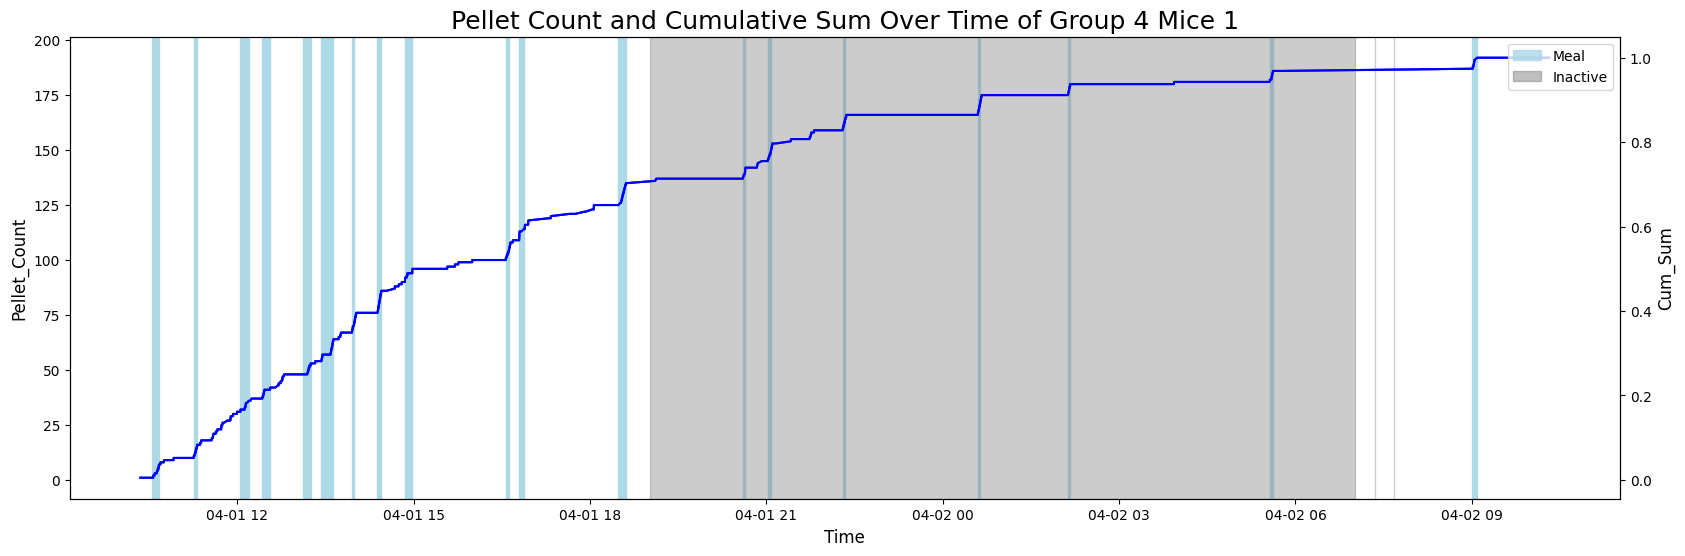

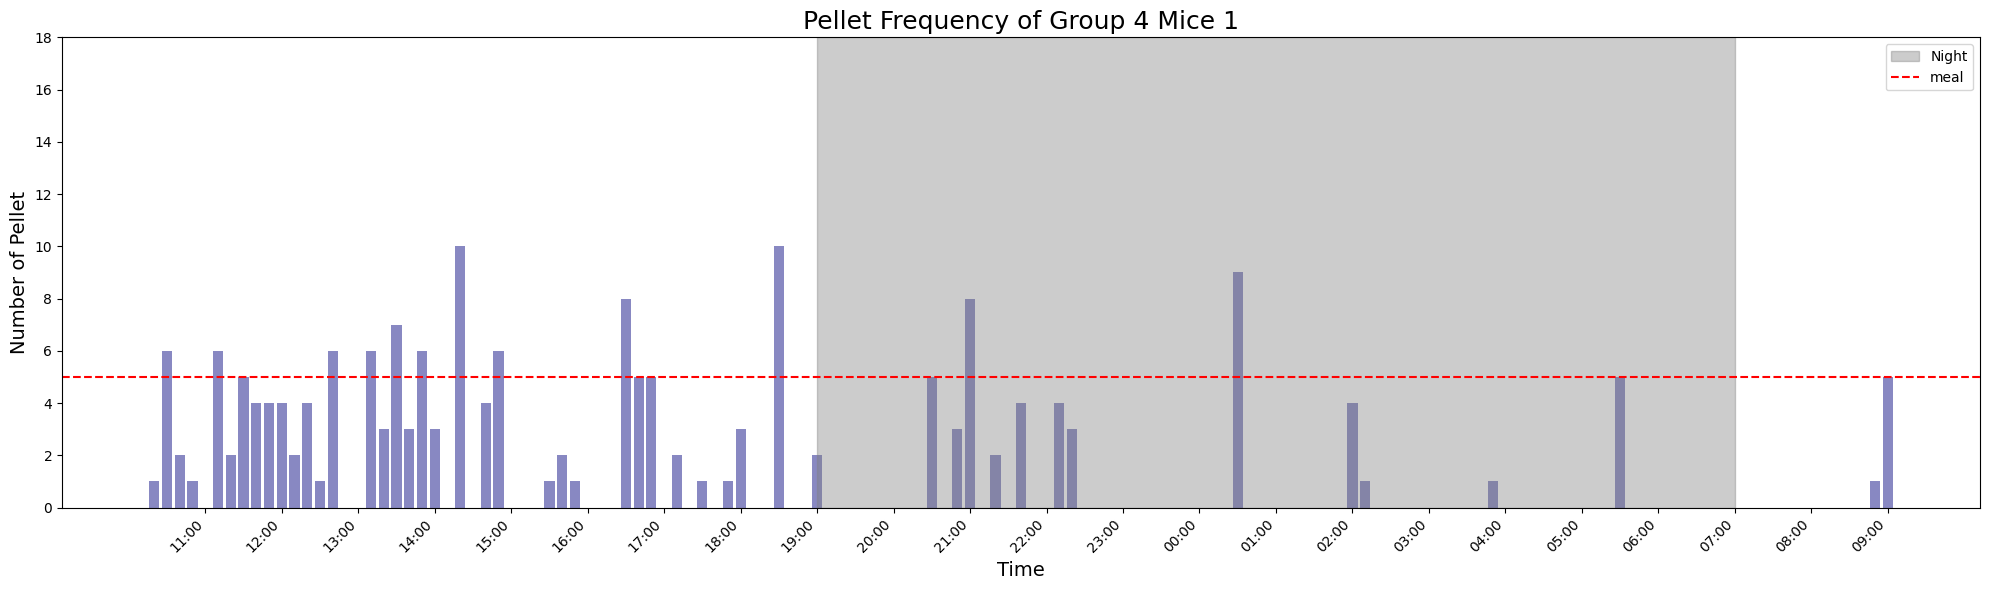

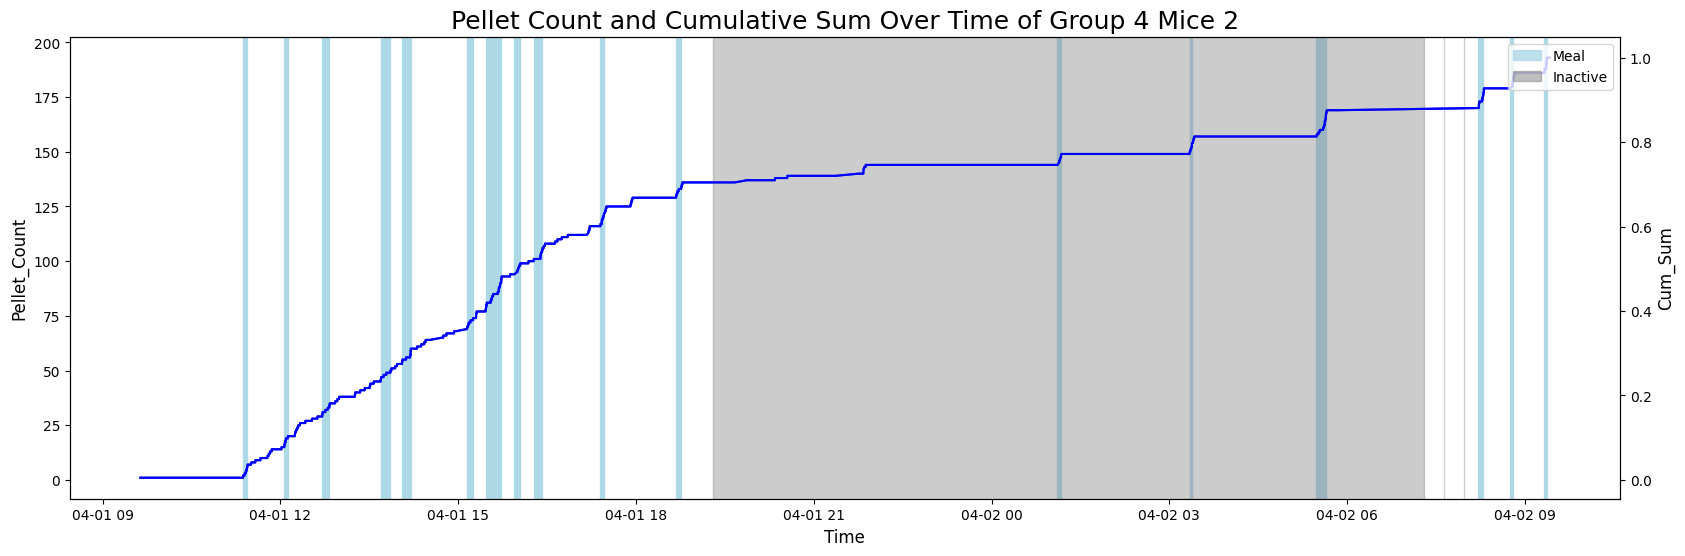

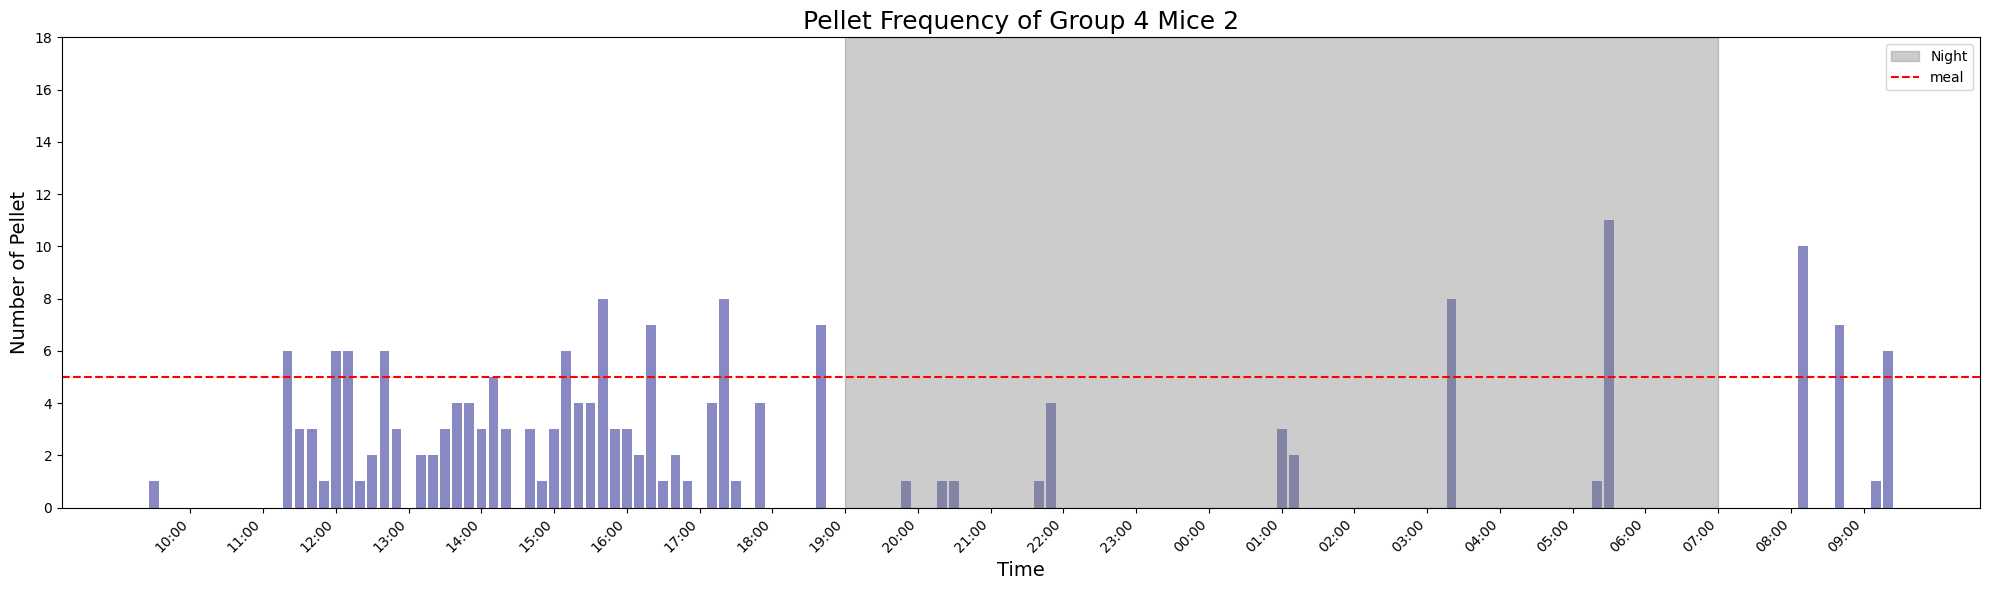

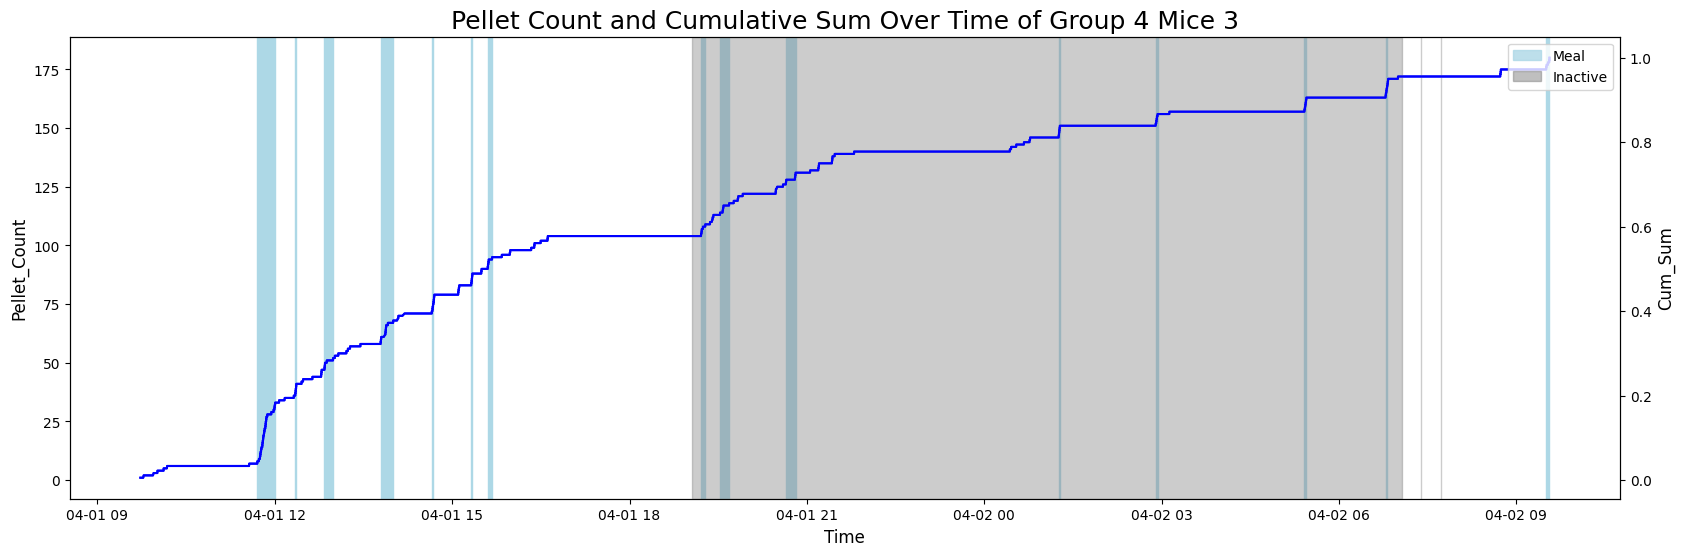

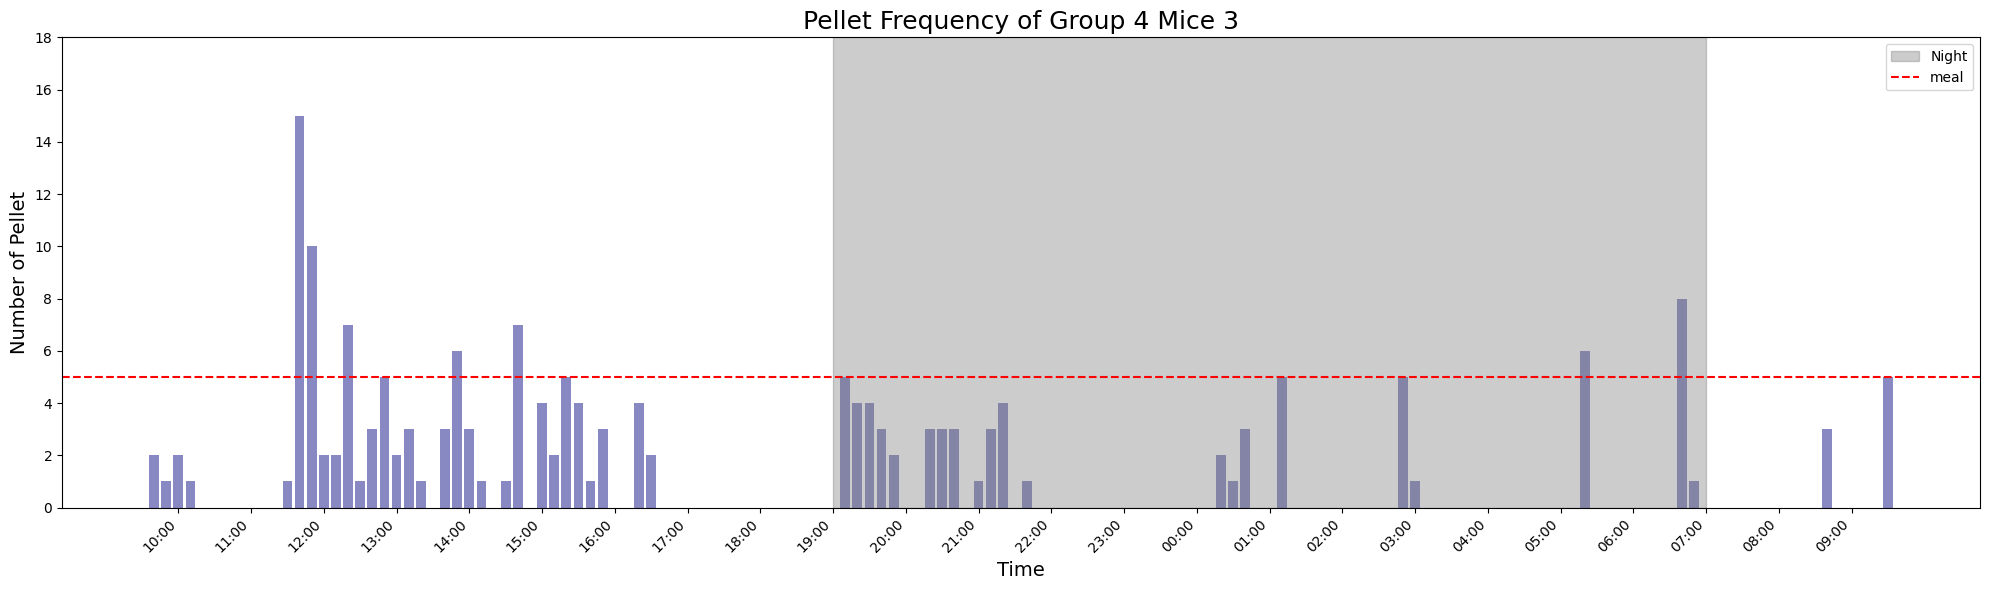

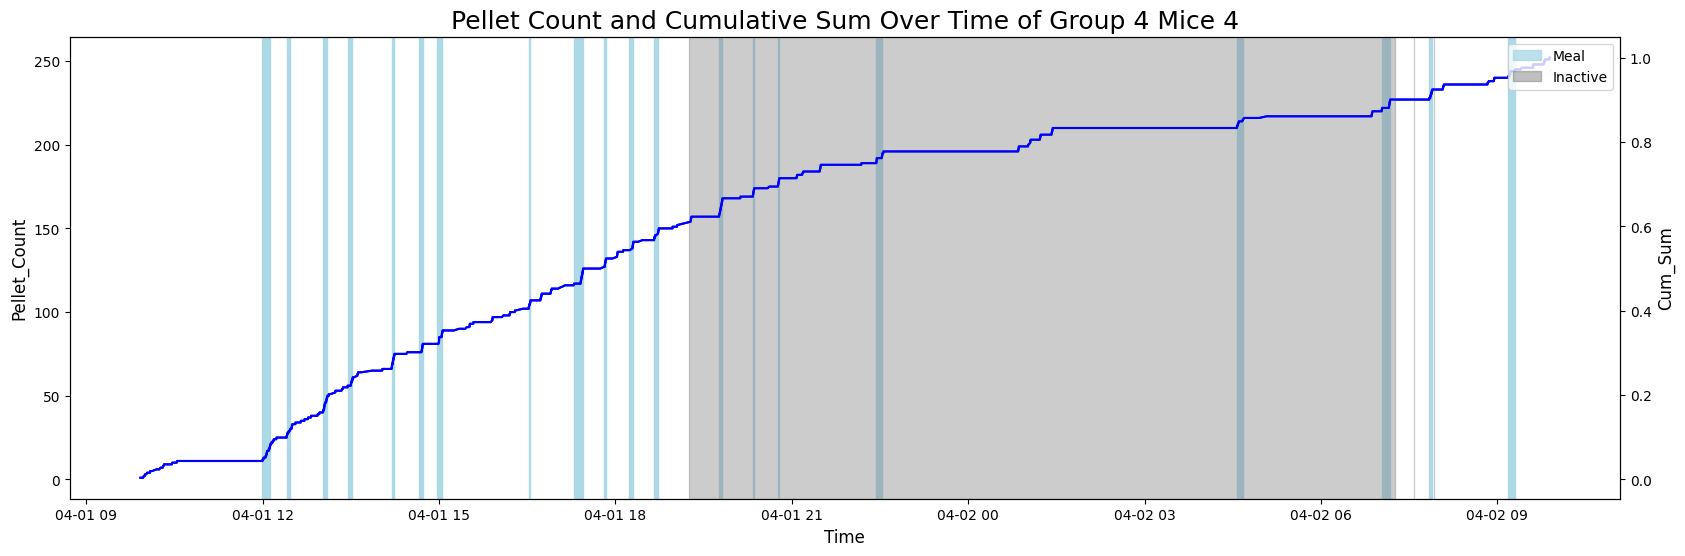

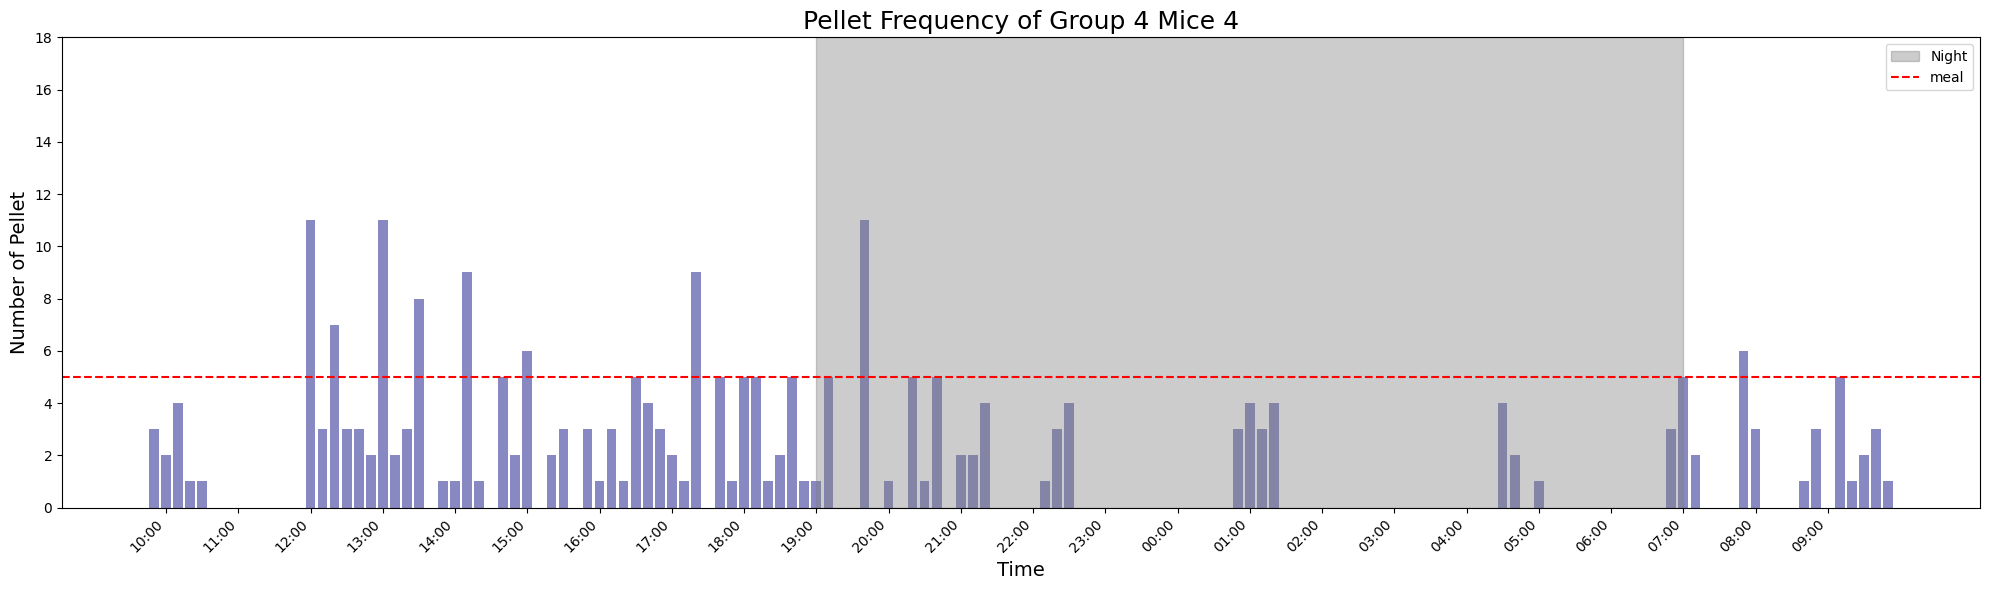

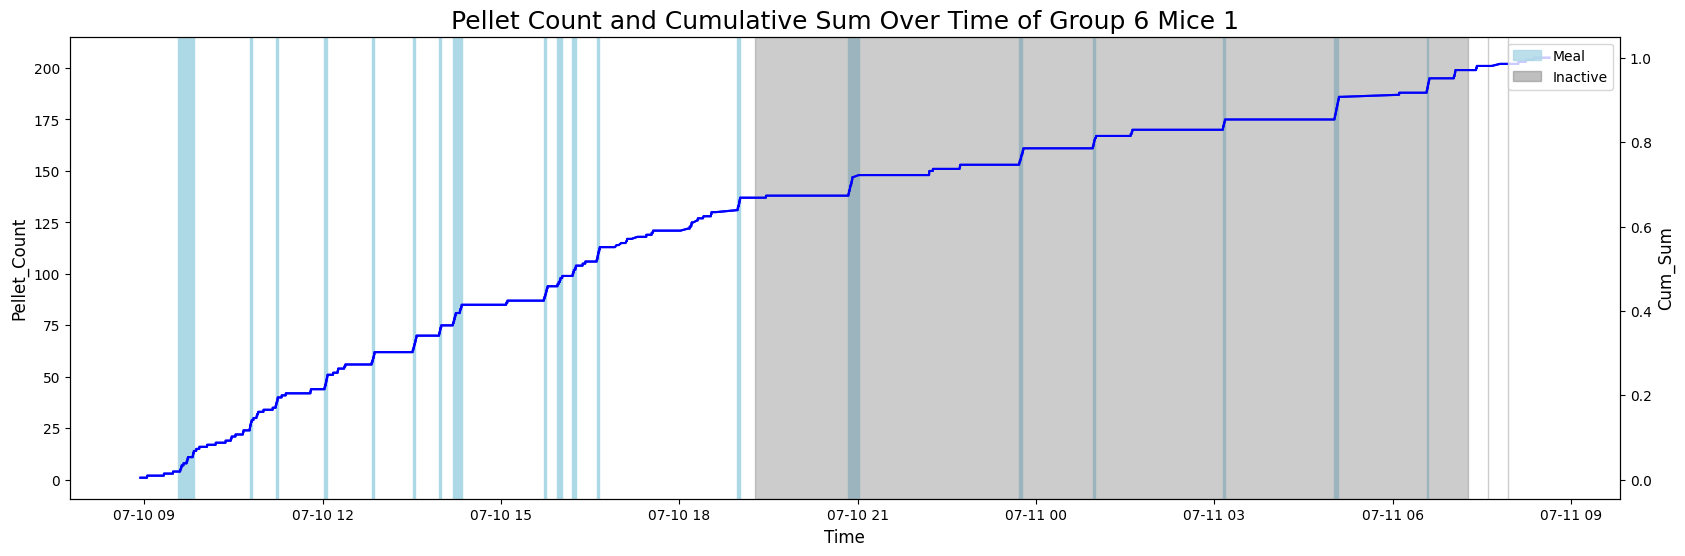

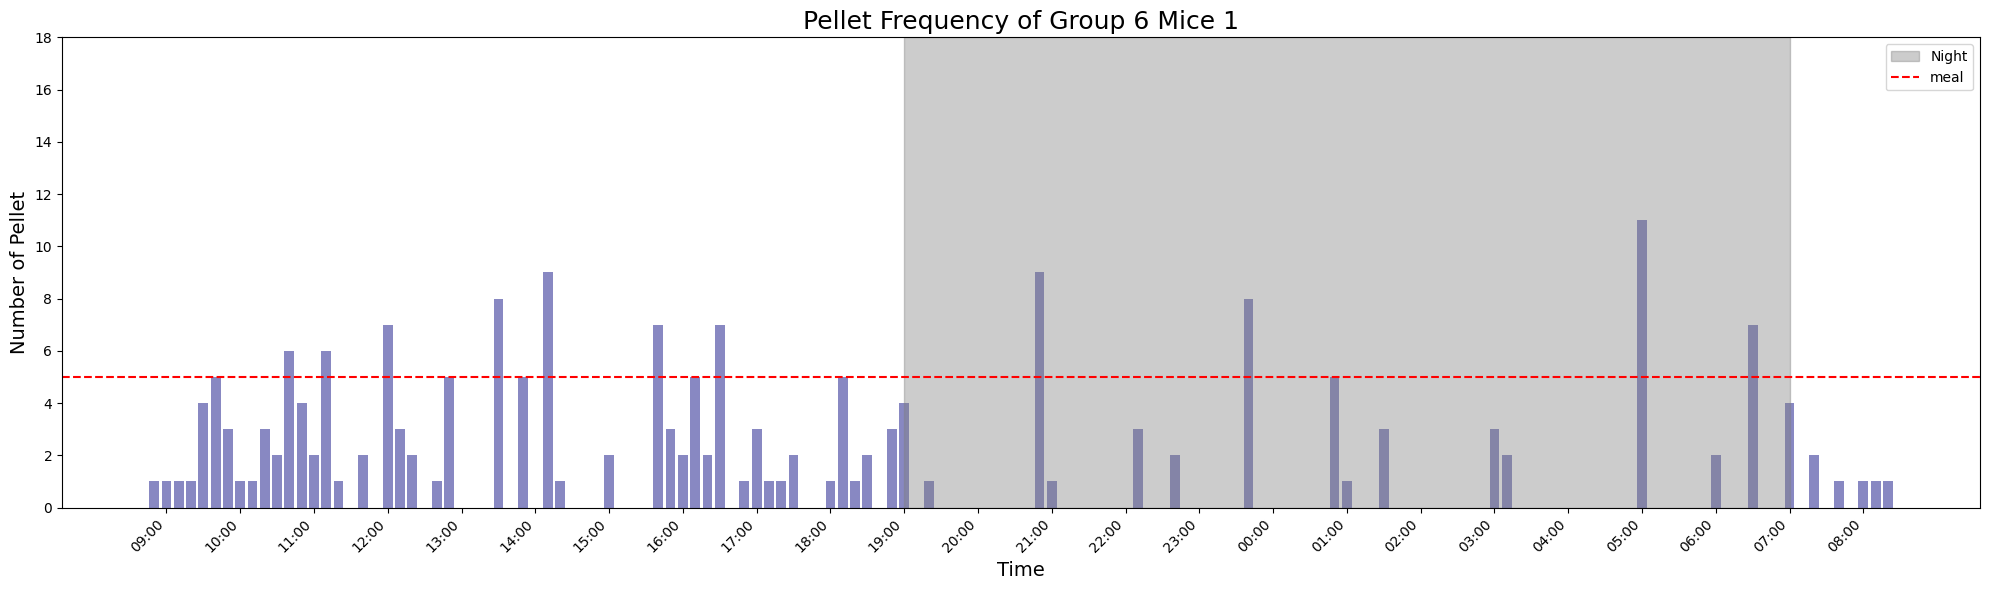

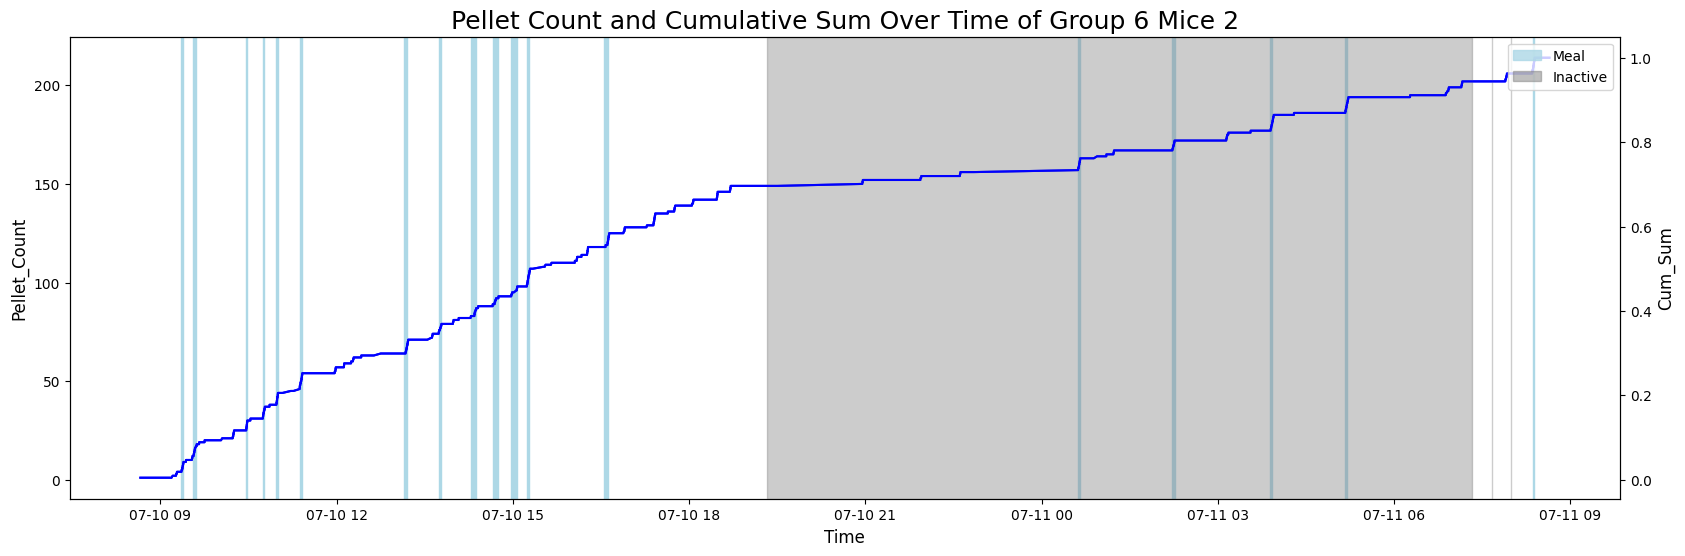

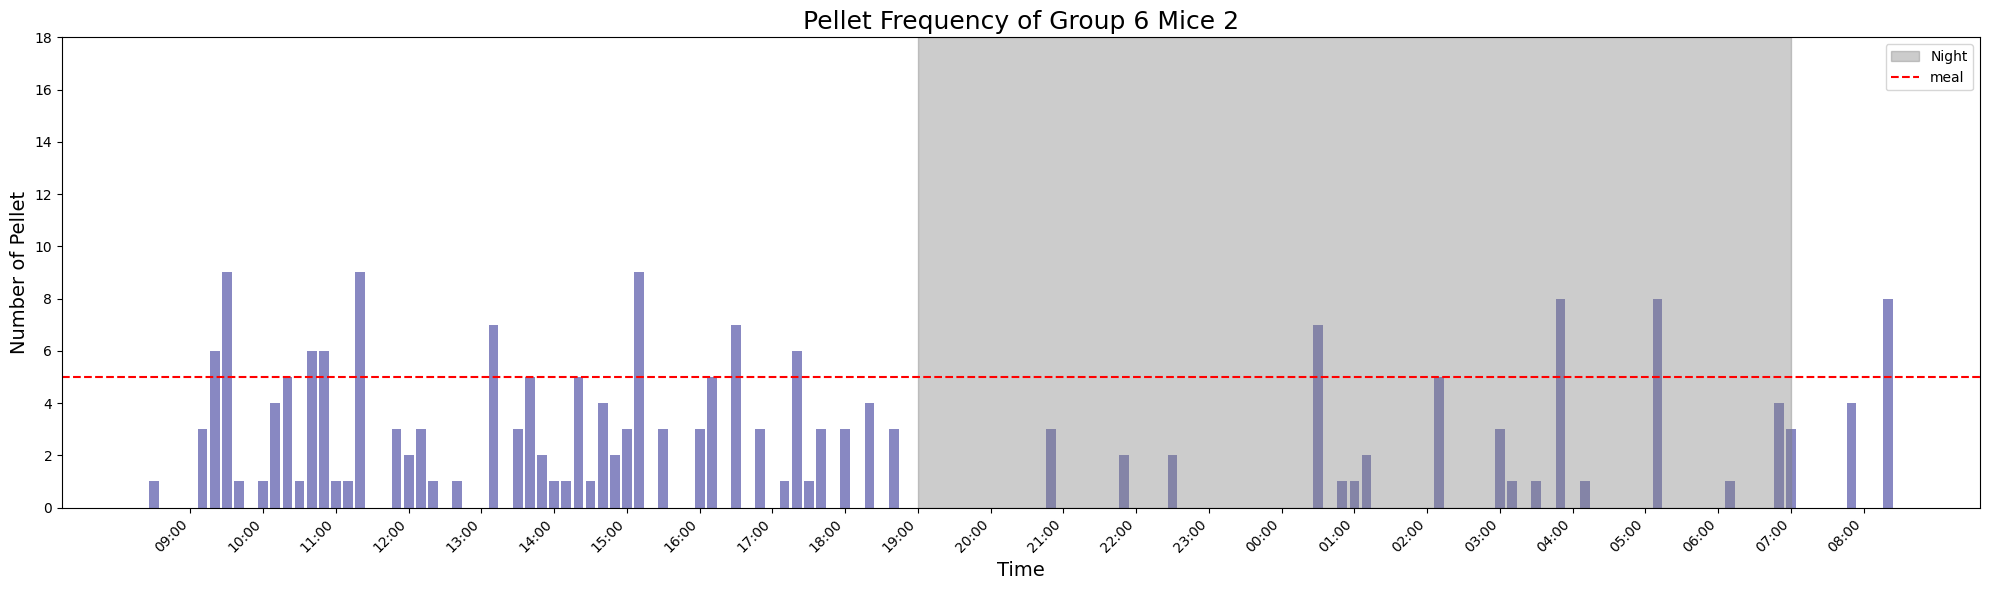

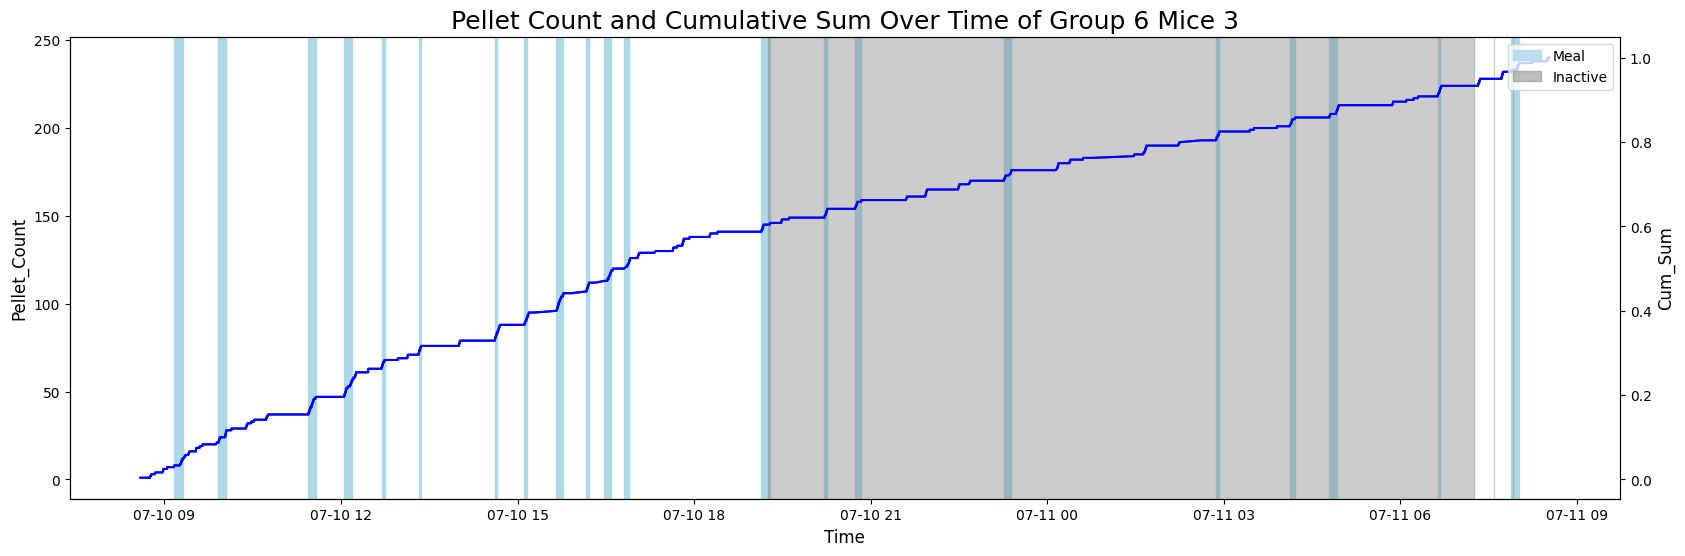

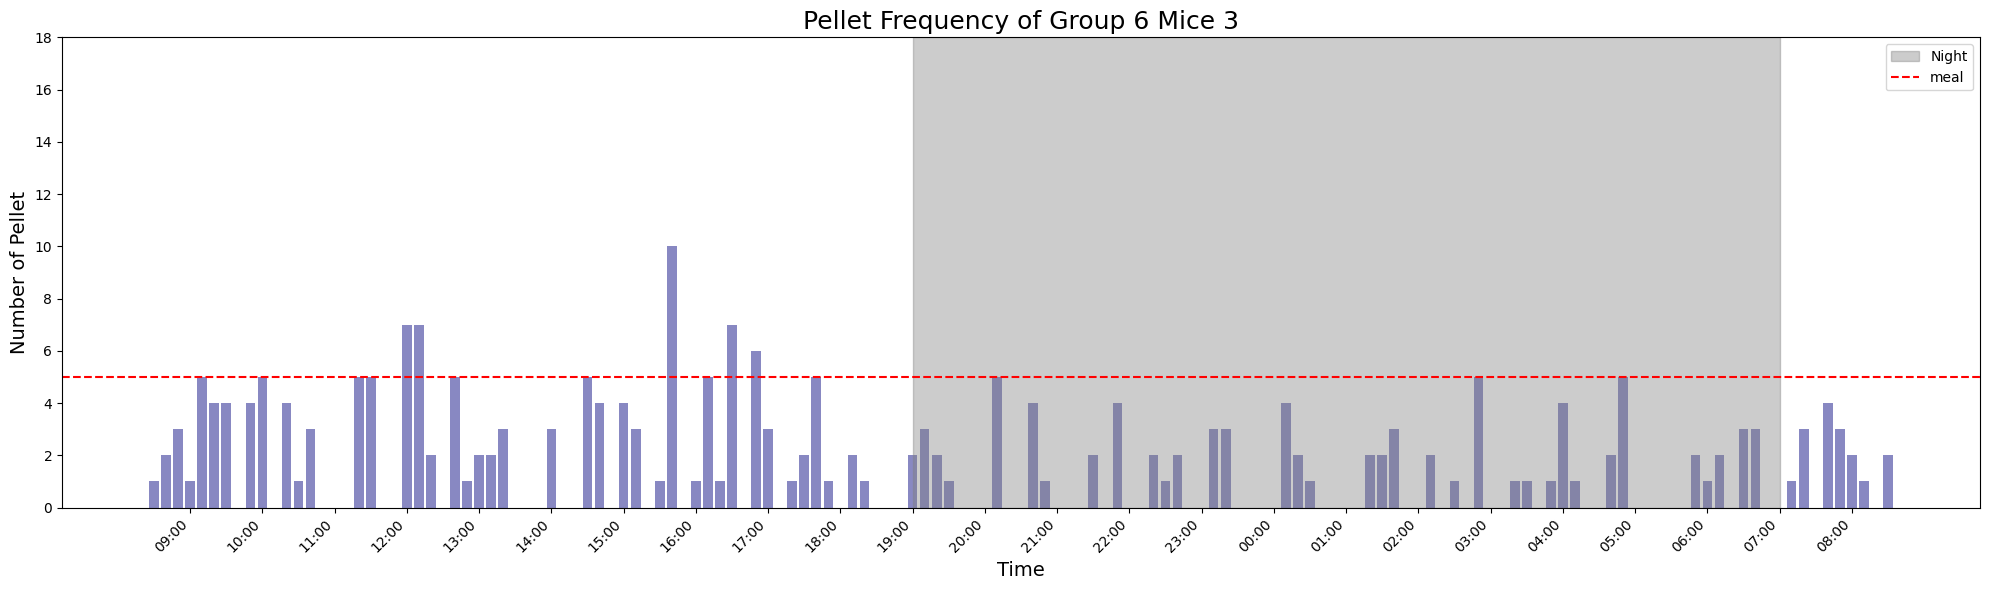

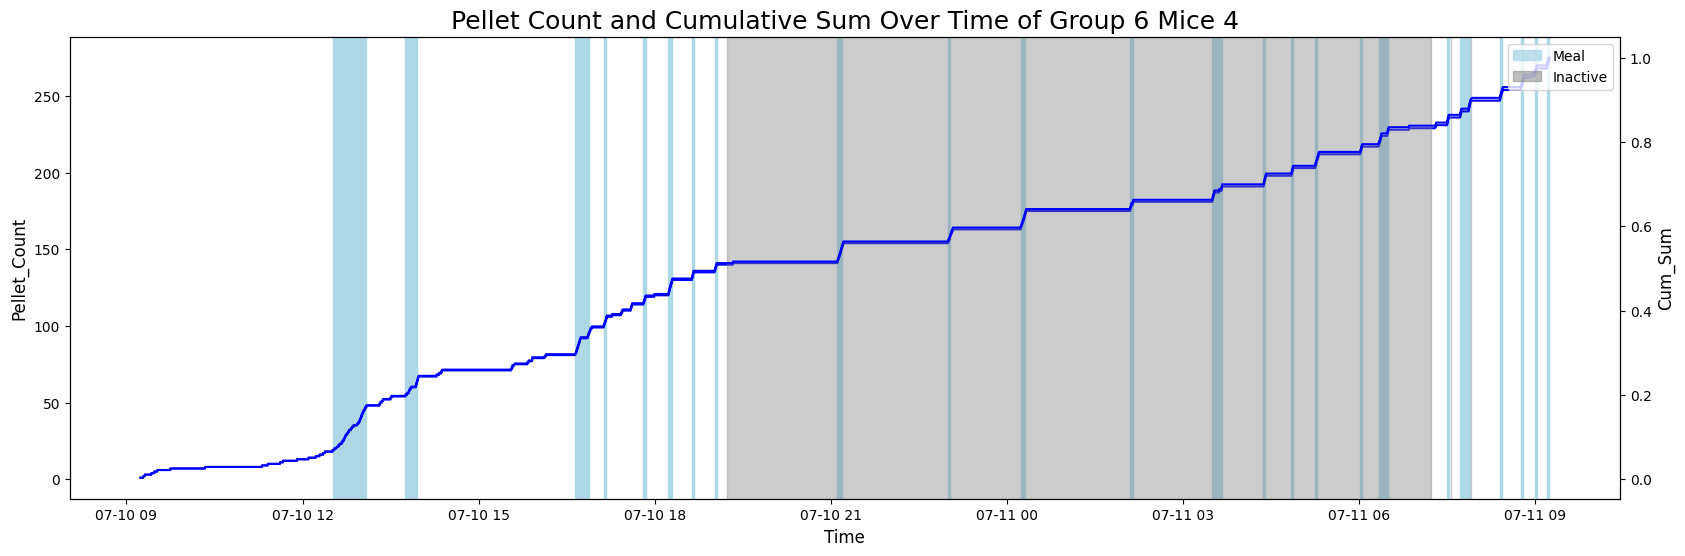

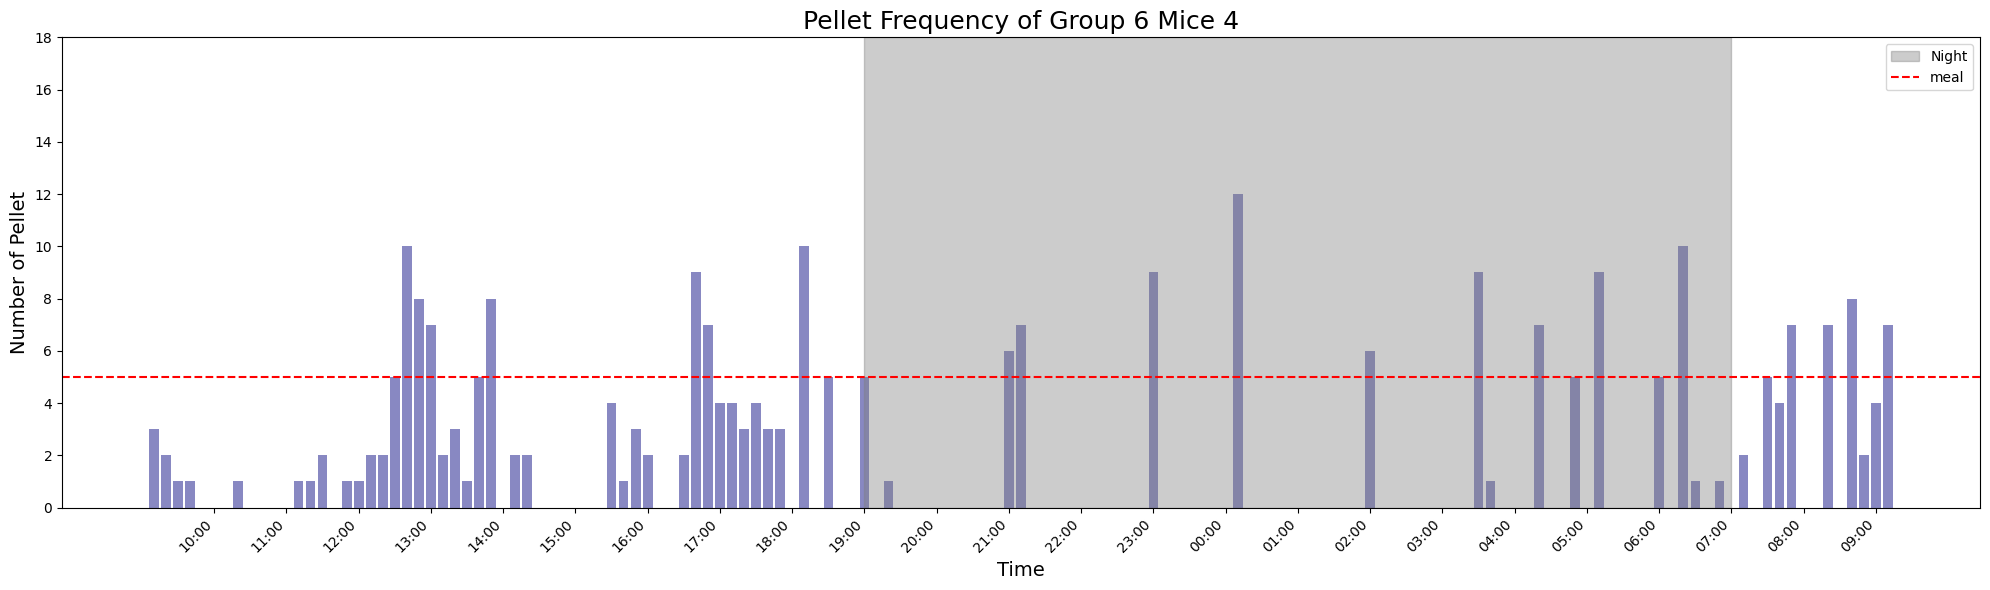

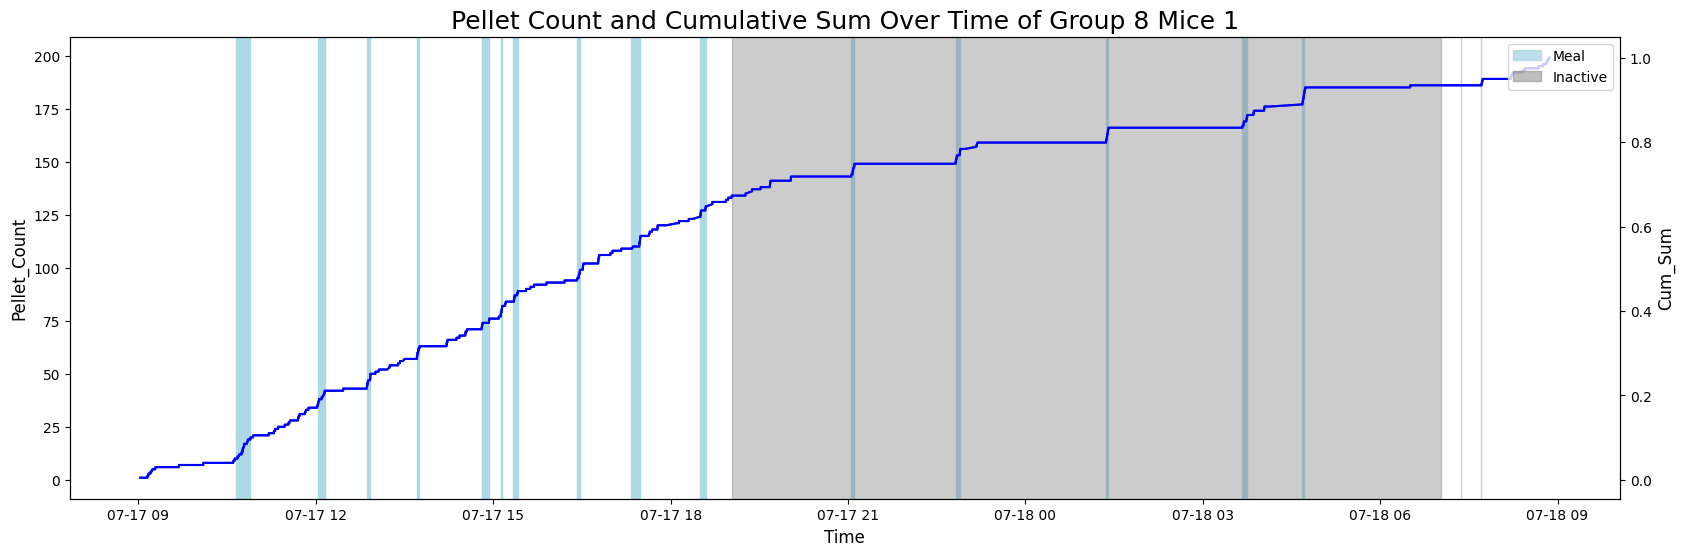

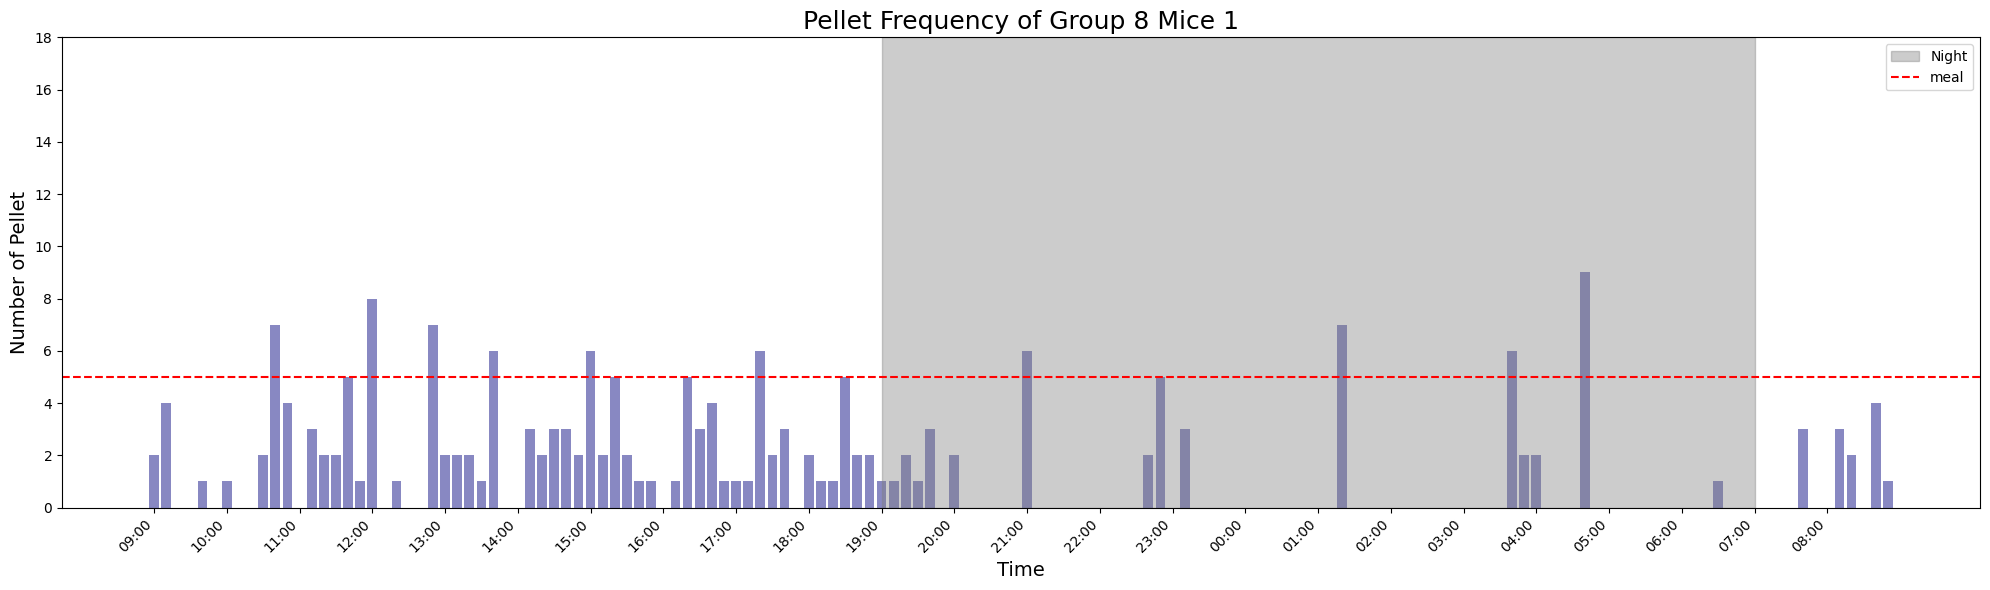

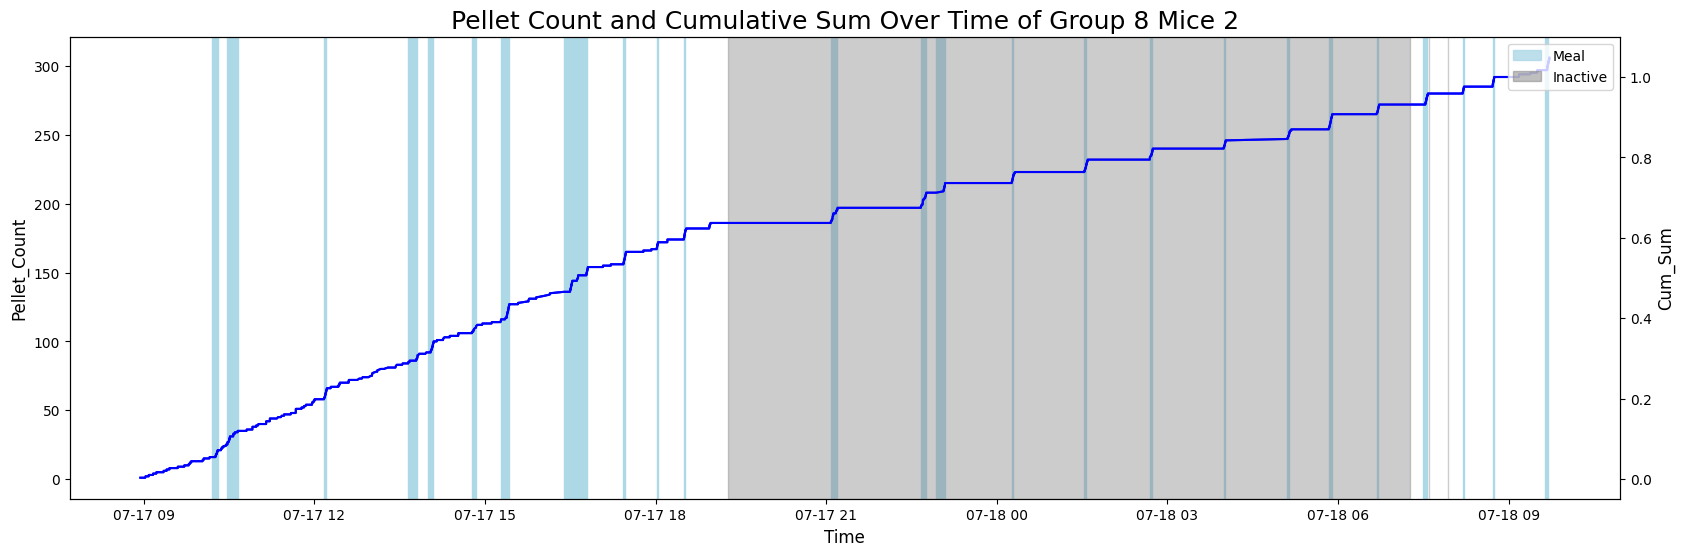

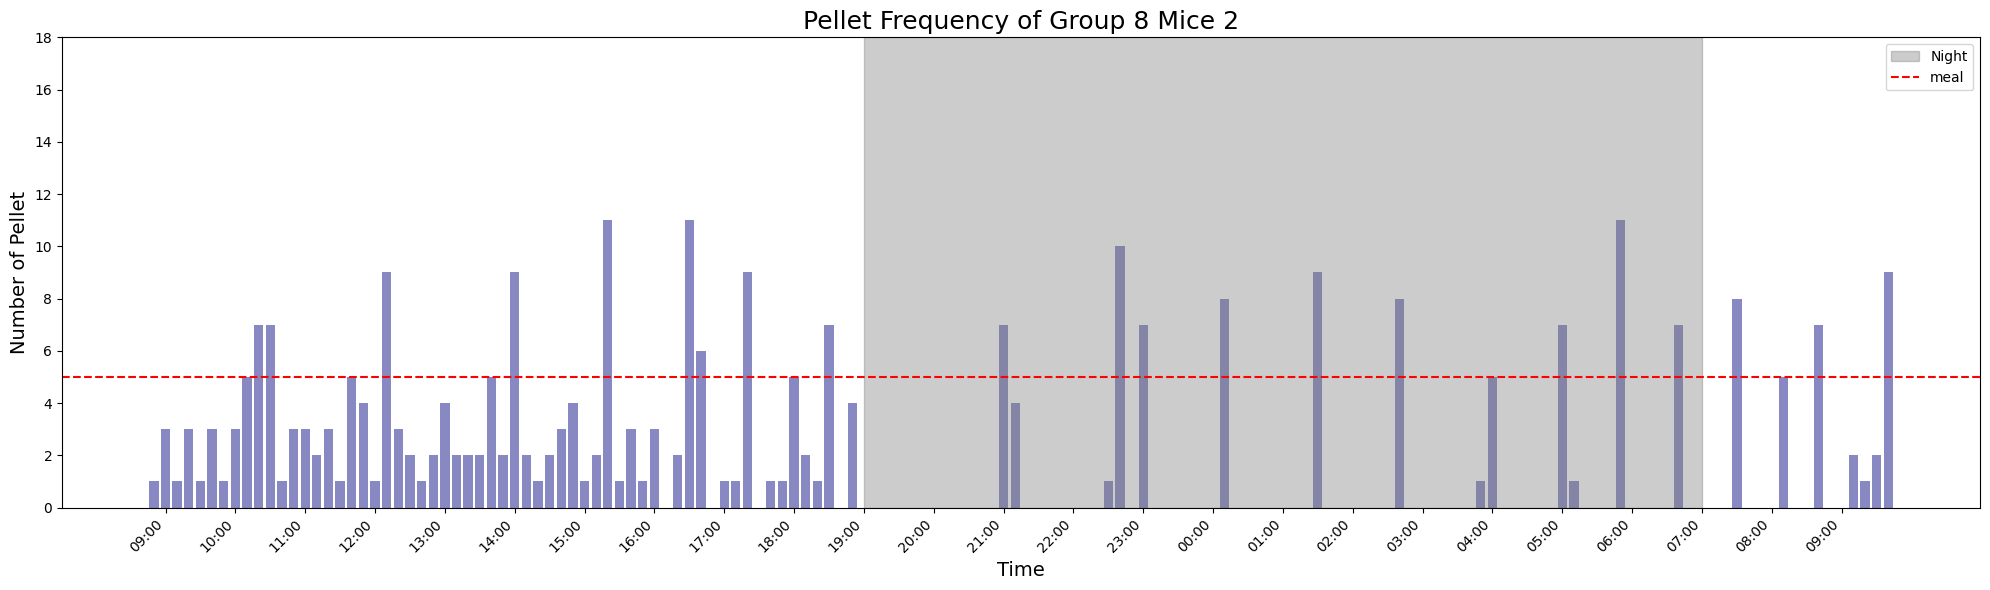

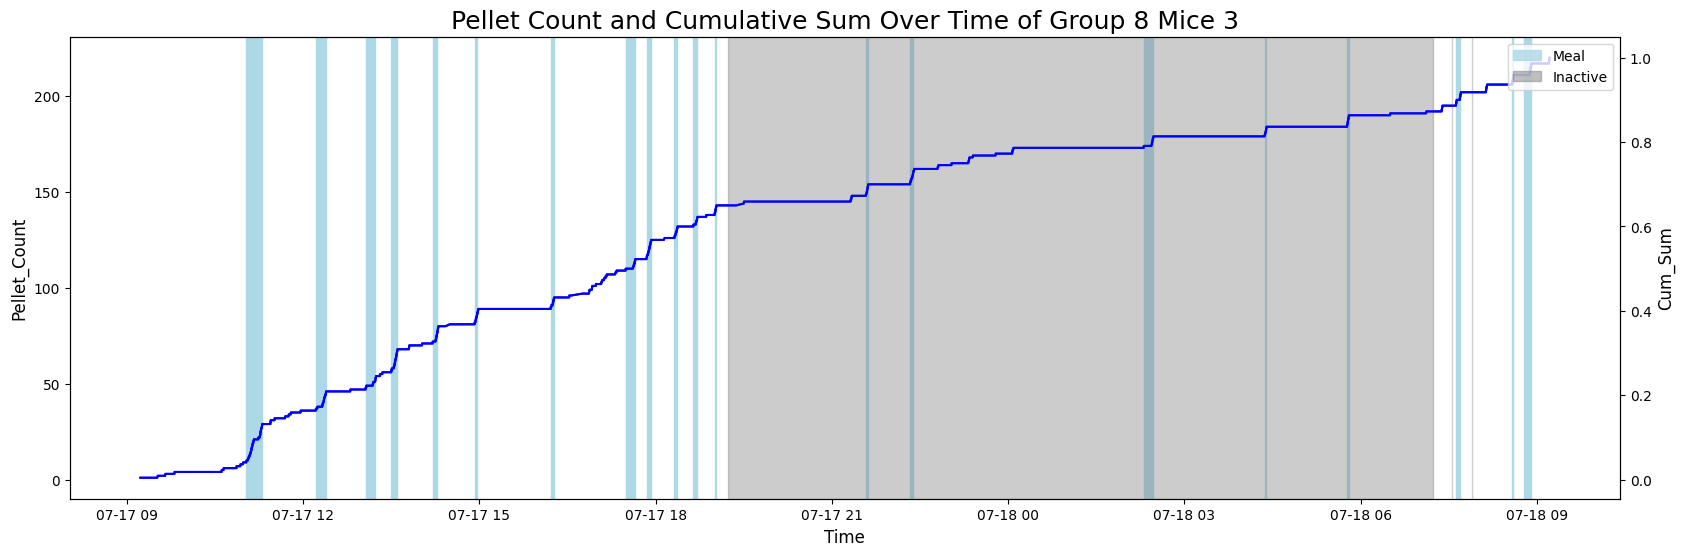

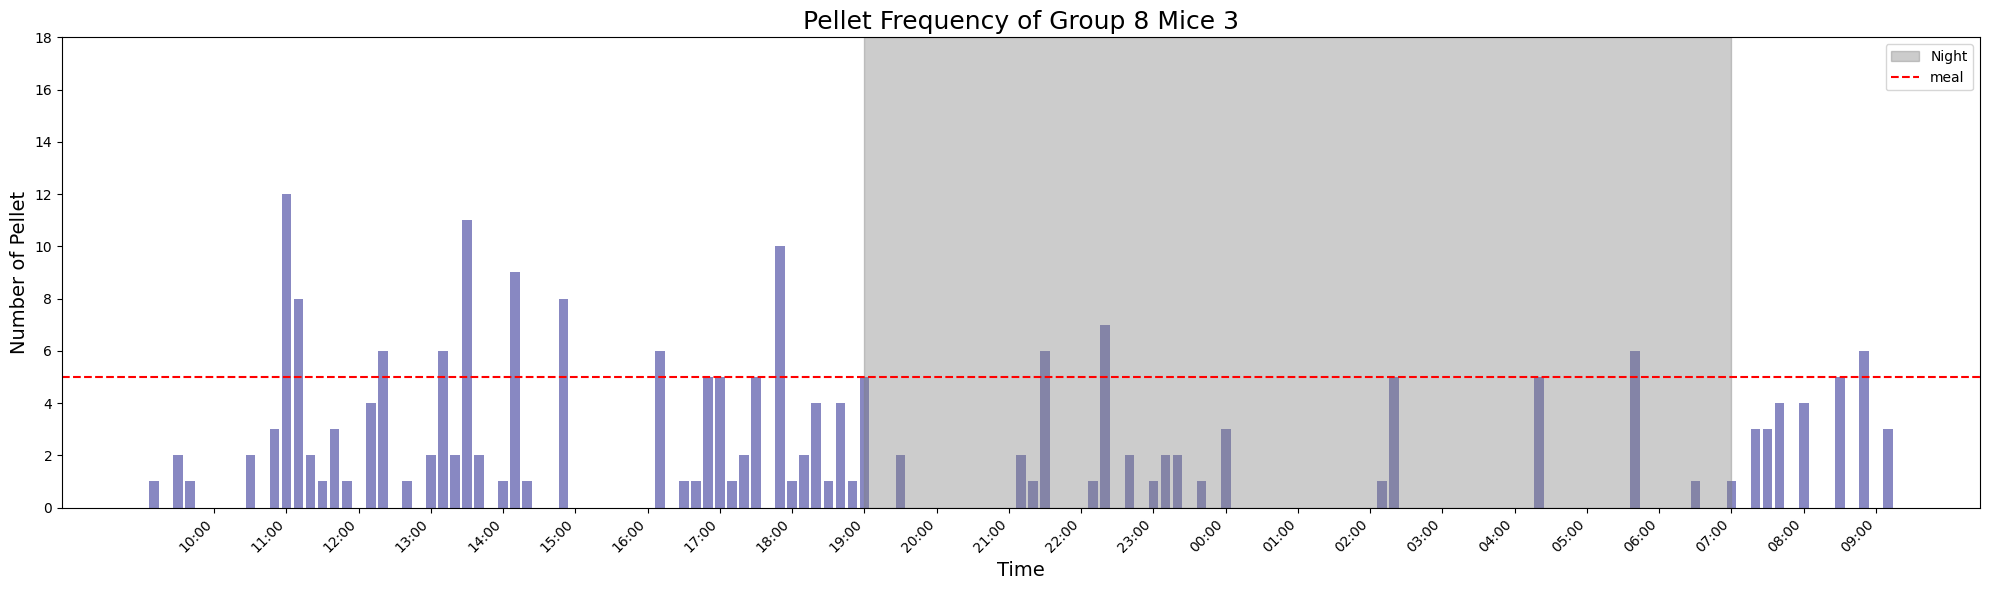

In [4]:
for sheet in paths.fr1_cask_sheet:
    data = read_excel_by_sheet(sheet, path)
    meal = ml.find_meals(data)
    group = ml.find_pellet_frequency(data)
    bhv, num = tl.get_bhv_num(sheet)
    ml.graphing_cum_count(data, meal, bhv, num)
    ml.graph_pellet_frequency(group, bhv, num)
    temp = ml.average_pellet(group)
    cask_pellet_avg.append(temp)
    avg = round(len(meal)/ml.experiment_duration(data), 2)
    fr1_cask_meal_count.append(avg)

In [11]:
print('Control Average Pellet:', ctrl_pellet_avg)
print('Cask Average Pellet:', cask_pellet_avg)
print('Average Meal Per day of Control Group:', fr1_ctrl_meal_count)
print('Average Meal Per day of Cask Group:', fr1_cask_meal_count)

Control Average Pellet: [9.842, 8.601, 8.844, 8.892, 10.196, 9.483, 9.483, 9.441, 9.357, 9.465, 9.959]
Cask Average Pellet: [8.471, 8.098, 7.552, 10.5, 8.723, 8.979, 10.0, 11.458, 8.35, 12.322, 9.167]


In [9]:
invs.perform_T_test(fr1_ctrl_meal_count, fr1_cask_meal_count)

P Value is  0.897258533560581
There is no significant difference between the two groups.


### Graph Average Pellet

/home/ftlab/Desktop/For_Andy/FED3-data/meals.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="Value", data=data, palette="pastel",
/home/ftlab/Desktop/For_Andy/FED3-data/meals.py:191: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.4'}` instead.

  sns.barplot(x="Group", y="Value", data=data, palette="pastel",


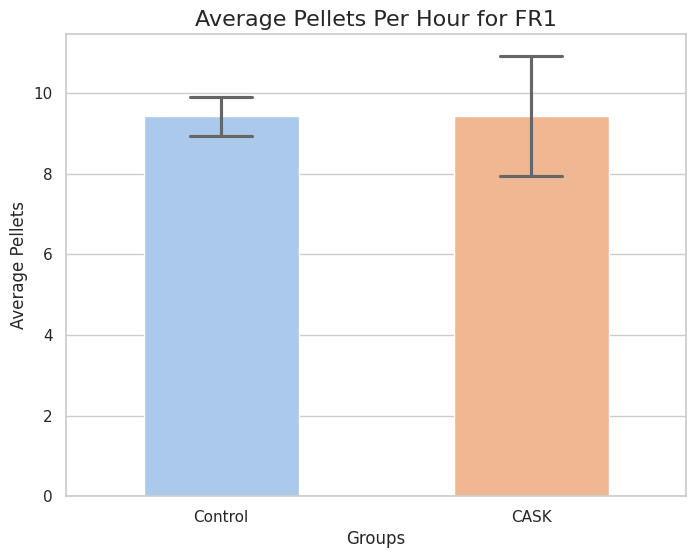

In [5]:
ml.graph_average_pellet(ctrl_pellet_avg, cask_pellet_avg, exp_name='CASK')

In [2]:
# Average pellet per hour in flip case
ctrl_flip = [8.743, 8.432, 7.142, 8.203, 7.115, 8.253]
cask_flip = [8.203, 8.256, 7.723, 10.776, 11.292, 4.818, 8.493, 7.52, 8.158]

ctrl_fr1 = ctrl_pellet_avg
cask_fr1 = cask_pellet_avg

In [5]:
invs.MannWhitneyUTest(ctrl_flip, cask_flip)

U Statistic: 24.5
P-value: 0.8135001872932537
There is no significant difference between the two groups.


In [15]:
invs.perform_T_test(ctrl_flip, ctrl_fr1)

P Value is  0.00014907115742250434
There is a significant difference between the two groups.


In [16]:
invs.MannWhitneyUTest(cask_flip, cask_fr1)

U Statistic: 29.0
P-value: 0.12864313895307422
There is no significant difference between the two groups.


In [17]:
invs.perform_T_test(cask_flip, cask_fr1)

P Value is  0.17527182217019896
There is no significant difference between the two groups.


* Pellet Intervals of cask group and control group has generally no significant difference
* Experimental groups has larger variance among their average pellet intervals